# Distribution of Secretory Index, Clustering and Correlation analysis

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import squarify 

#### Loading samples and secretory index

In [3]:
genes=np.load("/work1/laeb/genes_tpm_v11_clean_noutliers.npy",allow_pickle=True)
samples=np.load("/work1/laeb/samples_tpm_v11_clean_noutliers.npy",allow_pickle=True)
X=np.load("/work1/laeb/results_tpm_v11_clean_noutliers.npy",allow_pickle=True)
results=pd.DataFrame(X,index=genes,columns=samples)

In [4]:
results.head()

GSM741172   GSM741170  GSM741171   GSM907015  GSM1193921  GSM1098188  \
A1BG      1.514984    1.316501   0.945544   12.863701   71.141045    0.738105   
A1CF      0.208822    0.199274   0.138544    0.058604    0.301775    0.034464   
A2M      61.154045  141.594360  62.881958  109.156868    0.000000  313.137146   
A2ML1     0.373835    0.262869   0.266668    0.799892    0.655797    0.109945   
A3GALT2   0.722773    1.094620   0.645631    0.000000    0.000000    0.458957   

         GSM1193928  GSM1048186  GSM1216828  GSM1241249  ...  GSM5572862  \
A1BG     134.292114   10.272301    2.855723    0.000000  ...    0.778685   
A1CF       1.374310    0.267306   13.903001    0.000000  ...    0.163493   
A2M        0.000000  216.393066   22.510412    0.000000  ...    0.000000   
A2ML1      0.366945    4.065595    0.190527    1.748747  ...    0.112173   
A3GALT2    0.000000    4.969500    0.000000    0.000000  ...    0.000000   

         GSM5577332  GSM5577333  GSM5577334  GSM5577335  GSM5577336  \
A1BG       6.074946    6.227352    5.103860    8.809099    7.493229   
A1CF       0.129097    0.266828    0.162259    0.165147    0.261044   
A2M        0.130720    0.426572    0.000000    0.507422    0.200596   
A2ML1      1.403640    2.326312    2.850472    3.334096    3.415315   
A3GALT2    0.457722    0.104935    0.179656    0.000000    0.313955   

         GSM5577337  GSM5580099  GSM5580100  GSM5580102  
A1BG       7.746690   42.761230   35.295048   35.235378  
A1CF       0.246418    0.013703    0.031029    0.020903  
A2M        0.000000  314.406342  426.812805  311.372803  
A2ML1      2.629406    0.064991    0.255675    0.041696  
A3GALT2    0.304647    0.000000    0.000000    0.151392  

[5 rows x 62408 columns]

In [5]:
secretome_included=(pd.read_csv("../outputs/secretome_included_V11.csv",header=None))[0].tolist()

In [6]:
secretome_results=results.loc[secretome_included].T

In [7]:
secretome_results

DEFB1     APOA5  IFNL1     WNT3A     NELL1         C1QA  \
GSM741172   0.000000  0.000000    0.0  0.017862  0.175648     0.000000   
GSM741170   0.000000  0.000000    0.0  0.000000  0.127218     0.000000   
GSM741171   0.000000  0.000000    0.0  0.000000  0.152111     0.000000   
GSM907015   9.266400  0.000000    0.0  0.000000  0.000000   397.995270   
GSM1193921  0.000000  0.000000    0.0  0.000000  0.000000     0.000000   
...              ...       ...    ...       ...       ...          ...   
GSM5577336  0.000000  0.000000    0.0  0.000000  0.154373     0.000000   
GSM5577337  0.000000  0.361413    0.0  0.000000  0.467635     0.000000   
GSM5580099  0.208993  0.000000    0.0  0.000000  0.000000  2344.982910   
GSM5580100  0.483378  0.000000    0.0  0.000000  0.000000  2504.083496   
GSM5580102  0.000000  0.000000    0.0  0.000000  0.000000  2412.965332   

            IGHV3-21     LYZL4        NRP1      CORT  ...  DEFB130A      ENAM  \
GSM741172        0.0  0.000000   48.873245  0.892983  ...       0.0  0.472937   
GSM741170        0.0  0.066895   48.916134  0.817215  ...       0.0  0.394758   
GSM741171        0.0  0.000000   45.693241  0.846212  ...       0.0  0.742195   
GSM907015        0.0  0.000000   56.409229  0.213713  ...       0.0  0.679724   
GSM1193921       0.0  0.000000  438.418396  2.641770  ...       0.0  0.141226   
...              ...       ...         ...       ...  ...       ...       ...   
GSM5577336       0.0  0.000000  239.025406  1.619610  ...       0.0  7.271180   
GSM5577337       0.0  0.000000  221.776825  1.947800  ...       0.0  4.565959   
GSM5580099       0.0  0.000000  803.978882  0.000000  ...       0.0  1.106210   
GSM5580100       0.0  0.000000  793.046753  0.113173  ...       0.0  1.287860   
GSM5580102       0.0  0.000000  981.910400  0.186872  ...       0.0  0.000000   

            SCGB1D4       IL1RN     TULP1      CPA2    ANGPT2      FBN3  \
GSM741172       0.0    0.062562  0.943082  0.391812  0.596577  0.013834   
GSM741170       0.0    0.088234  0.600469  0.102876  0.371873  0.002769   
GSM741171       0.0    0.097992  0.516891  0.295096  0.257031  0.002481   
GSM907015       0.0  806.749084  0.244122  0.000000  0.308401  0.000000   
GSM1193921      0.0    0.000000  0.664932  0.333075  6.217017  0.000000   
...             ...         ...       ...       ...       ...       ...   
GSM5577336      0.0    0.000000  2.483172  0.074659  8.073009  0.000000   
GSM5577337      0.0    0.082592  2.398930  0.000000  6.881490  0.000000   
GSM5580099      0.0   82.296349  0.490129  0.000000  0.168513  0.000000   
GSM5580100      0.0   56.952728  0.891013  0.000000  0.163867  0.000000   
GSM5580102      0.0   77.752686  0.322305  0.000000  0.100557  0.000000   

              SERPINB2  DEFA1  
GSM741172     0.000000    0.0  
GSM741170     0.000000    0.0  
GSM741171     0.000000    0.0  
GSM907015     1.735550    0.0  
GSM1193921    4.529477    0.0  
...                ...    ...  
GSM5577336  131.555191    0.0  
GSM5577337  135.527161    0.0  
GSM5580099   43.952732    0.0  
GSM5580100   10.771558    0.0  
GSM5580102    7.566462    0.0  

[62408 rows x 1890 columns]

Loading the secretory index

In [8]:
sample_types=pd.read_csv("../outputs/si_percentage_ctype_no_outliers.csv",index_col=0)
#sample_types.columns=["sample","percentage","cell_type"]

In [9]:
sample_types.head()

percentage   cell_type          SI
GSM741172     4.511082        HELA   451.10815
GSM741170     4.583831        HELA   458.38312
GSM741171     4.867313        HELA   486.73130
GSM907015    14.701526  Macrophage  1470.15260
GSM1193921    2.805667    MDAMB231   280.56674

In [10]:
order=sample_types.groupby("cell_type").median().sort_values(by="percentage",ascending=False).index.values

In [11]:
len(samples)

62408

In [12]:
secretome_results.set_index(sample_types["cell_type"].values,inplace=True)

In [13]:
cluster_df=secretome_results.groupby(secretome_results.index).median()

In [14]:
sorted_cluster=cluster_df.reindex(order)

In [15]:
sorted_cluster

DEFB1      APOA5  IFNL1     WNT3A     NELL1      C1QA  \
Plasma Cell        0.000000   0.000000    0.0  0.000000  0.000000  0.000000   
Pancreatic Islet   0.000000   0.000000    0.0  0.000000  0.000000  0.000000   
Chondrocyte       10.021300   0.000000    0.0  0.000000  0.084274  0.000000   
Alpha Cell         0.000000   0.000000    0.0  0.000000  0.000000  0.000000   
Hepatocyte        75.753647  16.757751    0.0  0.000000  0.041412  0.155097   
...                     ...        ...    ...       ...       ...       ...   
HEK293             0.000000   0.000000    0.0  0.818338  0.443983  0.000000   
FLPIN TREX 293     0.126731   0.000000    0.0  0.863166  0.518888  0.000000   
IMR32              0.000000   0.000000    0.0  0.000000  2.306250  0.000000   
K562               0.000000   0.000000    0.0  0.000000  0.000000  0.000000   
Thymocyte          0.000000   0.000000    0.0  0.000000  0.000000  0.000000   

                  IGHV3-21  LYZL4       NRP1      CORT  ...  DEFB130A  \
Plasma Cell            0.0    0.0   0.171816  0.000000  ...       0.0   
Pancreatic Islet       0.0    0.0   1.556350  0.000000  ...       0.0   
Chondrocyte            0.0    0.0  46.790962  0.140089  ...       0.0   
Alpha Cell             0.0    0.0  18.385235  0.000000  ...       0.0   
Hepatocyte             0.0    0.0  21.481237  0.407583  ...       0.0   
...                    ...    ...        ...       ...  ...       ...   
HEK293                 0.0    0.0  16.313925  1.108840  ...       0.0   
FLPIN TREX 293         0.0    0.0  29.841089  0.960801  ...       0.0   
IMR32                  0.0    0.0  10.087933  1.906840  ...       0.0   
K562                   0.0    0.0   0.907569  0.167096  ...       0.0   
Thymocyte              0.0    0.0   1.470621  1.490120  ...       0.0   

                       ENAM  SCGB1D4     IL1RN     TULP1      CPA2    ANGPT2  \
Plasma Cell        0.917095      0.0  0.000000  0.000000  0.000000  0.346513   
Pancreatic Islet   0.000000      0.0  0.000000  0.000000  0.000000  0.000000   
Chondrocyte        0.481343      0.0  0.507197  0.056097  0.088267  2.061844   
Alpha Cell         5.073479      0.0  0.000000  0.000000  1.761529  0.801901   
Hepatocyte         0.948033      0.0  5.030625  0.085173  0.057878  0.419050   
...                     ...      ...       ...       ...       ...       ...   
HEK293             0.575638      0.0  0.000000  0.119214  0.073459  0.413728   
FLPIN TREX 293     0.879372      0.0  0.000000  0.217930  0.144083  0.677371   
IMR32              0.000000      0.0  0.000000  0.000000  0.000000  0.378762   
K562               0.559223      0.0  0.000000  0.271365  0.002357  0.289607   
Thymocyte         67.888252      0.0  0.000000  0.000000  0.000000  3.002648   

                      FBN3  SERPINB2  DEFA1  
Plasma Cell       0.000000  0.000000    0.0  
Pancreatic Islet  0.000000  0.000000    0.0  
Chondrocyte       0.000000  0.000000    0.0  
Alpha Cell        0.000000  0.000000    0.0  
Hepatocyte        0.032361  0.278899    0.0  
...                    ...       ...    ...  
HEK293            0.242711  0.000000    0.0  
FLPIN TREX 293    0.177741  0.000000    0.0  
IMR32             0.000000  0.000000    0.0  
K562              0.021166  0.000000    0.0  
Thymocyte         0.000000  0.000000    0.0  

[81 rows x 1890 columns]

In [16]:
#select top secretory genes expressed in all cell types
top_genes=[]
for cell in cluster_df.index.values:
    top_genes.extend(pd.Series.sort_values(sorted_cluster.loc[cell],ascending=False)[0:5].index.values)

In [17]:
len(set(top_genes))

93

In [19]:
sorted_cluster.T.loc[list(set(top_genes))]

Plasma Cell  Pancreatic Islet  Chondrocyte  Alpha Cell   Hepatocyte  \
SLPI       0.000000          0.000000    55.165100    0.000000    90.283096   
IL32       0.000000          0.000000     4.841706    2.693304   814.238403   
KLK2       0.000000          0.000000     0.567274    0.444037     0.441133   
NMU        0.000000          0.000000     0.251549    0.000000     0.000000   
ANXA1      0.000000          0.000000   632.179749    0.000000    43.402454   
...             ...               ...          ...         ...          ...   
PPIA     148.495392        485.614166  1267.005493  407.559204  1571.659546   
APOC1      0.000000          0.000000     4.881755    0.000000  1901.803711   
ITM2B     31.178556        486.730042  1275.359131  931.256775   494.042694   
S100A8     0.000000          0.000000     0.000000    0.000000     0.329391   
APOC3      0.000000          0.000000     0.000000    0.000000  3060.119141   

         Granulocyte   Osteoblast   Beta Cell  Hepatic Stellate Cell  \
SLPI       56.811401     0.288272    0.000000               0.037584   
IL32       23.455204    19.432182    2.265540              35.672203   
KLK2        6.050240     0.466529    0.285430               0.282758   
NMU         0.000000     0.108171    0.000000               0.000000   
ANXA1     158.092667   638.264893    0.000000             447.165009   
...              ...          ...         ...                    ...   
PPIA      106.934013  2066.492188  585.580688            2409.406250   
APOC1       0.885010     2.788345    0.000000               4.772848   
ITM2B    3329.280518   531.222839  502.099487             616.833557   
S100A8  12316.471680     0.000000    0.000000               0.000000   
APOC3       0.000000     0.000000    0.000000               0.000000   

               NHBE  ...       JURKAT        LNCAP          RKO       Neuron  \
SLPI    1931.518066  ...     0.000000    15.959156     0.000000     0.000000   
IL32      50.234280  ...   147.815826     5.596292   375.326111     0.000000   
KLK2       0.285268  ...     0.000000   113.306717     0.651013     0.000000   
NMU        7.264267  ...     0.000000    14.885244    20.776058     1.531240   
ANXA1   1000.420898  ...    84.347984     0.875322    49.089104     0.000000   
...             ...  ...          ...          ...          ...          ...   
PPIA    1919.076050  ...  3392.979004  3102.001709  2367.019531  1184.154907   
APOC1      2.712691  ...     0.000000     0.662431    29.481846     0.000000   
ITM2B   1049.547485  ...   235.616898   242.327423   145.709473   107.569824   
S100A8   480.804474  ...     0.000000     0.000000     0.000000     0.000000   
APOC3      0.000000  ...     0.000000     0.000000     0.000000     0.000000   

               293F       HEK293  FLPIN TREX 293        IMR32         K562  \
SLPI       0.039999     0.000000        0.559613     0.000000     0.000000   
IL32       3.279181     2.125288        3.688097     1.140717     0.571803   
KLK2       0.283728     0.707585        0.668673     1.040320     1.690130   
NMU       13.324450    20.202744       28.187223   104.389069   353.063232   
ANXA1     17.284756     4.974764       12.694045     0.000000   255.542007   
...             ...          ...             ...          ...          ...   
PPIA    3066.652344  2280.288574     2724.903809  4839.122070  2182.989746   
APOC1     76.616089    43.084862       26.945923     0.000000   182.159348   
ITM2B    178.996658   175.061096      219.296600    37.453201    59.600754   
S100A8     0.000000     0.000000        0.000000     0.000000     0.000000   
APOC3      0.000000     0.000000        0.000000     0.000000     0.000000   

         Thymocyte  
SLPI      0.000000  
IL32    102.304886  
KLK2     17.452976  
NMU       0.000000  
ANXA1    21.876007  
...            ...  
PPIA    853.946838  
APOC1     0.000000  
ITM2B    53.558620  
S100A8    6.603967  
APOC3     0.000000  

[93 rows x 81 columns]

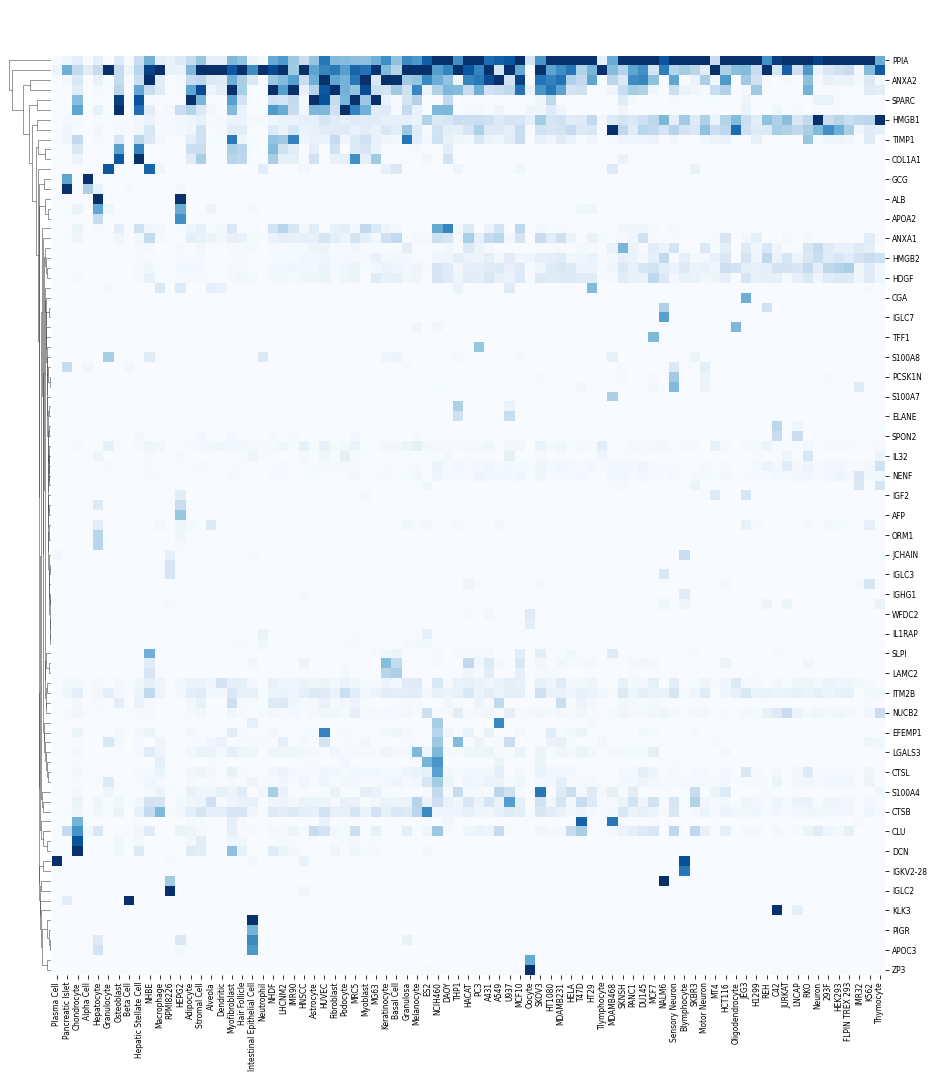

In [21]:
## clustermap standard scaling was disabled to allow visual inspection of the relative expression across cell types
plt.rcParams.update({'font.size': 7.5})
sns.clustermap(sorted_cluster.T.loc[list(set(top_genes))],figsize=(13,15),cmap="Blues",
               dendrogram_ratio=(0.05,0.05),standard_scale=1,cbar_pos=None,
               metric="euclidean",col_cluster=False,row_cluster=True,method="weighted"
              
              )
plt.savefig("../outputs/cluster_secretome_ordered.svg",bbox_inches="tight")

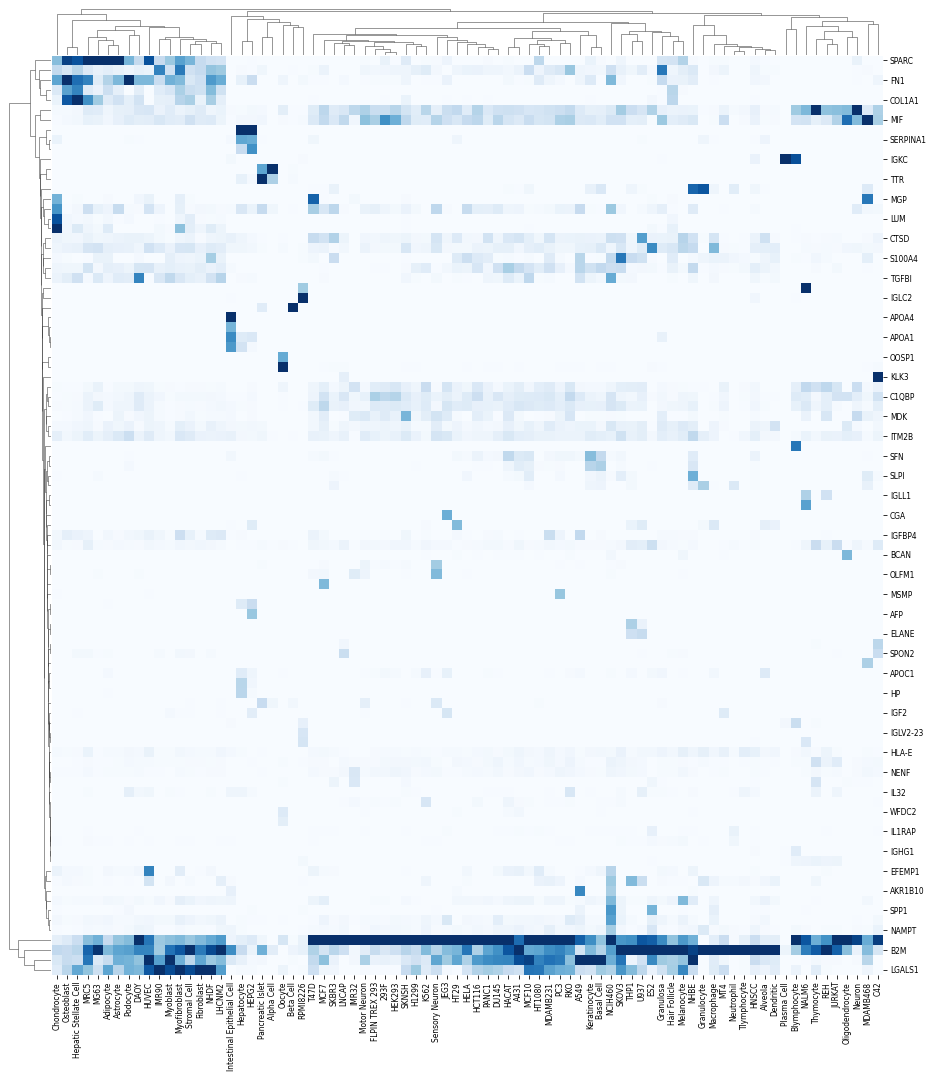

In [22]:
plt.rcParams.update({'font.size': 7.5})
sns.clustermap(sorted_cluster.T.loc[list(set(top_genes))],figsize=(13,15),cmap="Blues",
               dendrogram_ratio=(0.05,0.05),standard_scale=1,cbar_pos=None,
               metric="euclidean",method="complete"
              )

In [29]:
si=pd.read_csv("../outputs/si_V11_TPM_noutliers.csv",index_col=0)
si.columns=["cell_type","secreted"]

In [30]:
si.head()

cell_type  secreted
GSM741172         HELA       451
GSM741170         HELA       458
GSM741171         HELA       487
GSM907015   Macrophage      1470
GSM1193921    MDAMB231       281

In [31]:
si=si.loc[results.columns]

In [32]:
si

cell_type  secreted
GSM741172         HELA       451
GSM741170         HELA       458
GSM741171         HELA       487
GSM907015   Macrophage      1470
GSM1193921    MDAMB231       281
...                ...       ...
GSM5577336       HUVEC       534
GSM5577337       HUVEC       536
GSM5580099  Macrophage      1309
GSM5580100  Macrophage      1300
GSM5580102  Macrophage      1520

[62408 rows x 2 columns]

In [49]:
def gene_cor(gene):
    dataframe=pd.DataFrame(np.nan,index=results.columns, columns=["geneX","secre_score"])
    dataframe["secre_score"]=si.secreted
    dataframe["geneX"]=results.loc[gene]
    dataframe["logGene"]=np.log10(dataframe.geneX+1)
    dataframe["logScore"]=np.log10(dataframe["secre_score"]+1)

    g=sns.lmplot(x="secre_score",y="logGene",data=dataframe,fit_reg=False, scatter_kws= {'alpha': 0.1}, markers='.')
    #g=sns.lmplot(x="logScore",y="logGene",data=dataframe,fit_reg=False)
    spearman, pval=spearmanr(results.loc[gene], si.secreted)
    #pval=scipy.stats.pearsonr(results.loc[gene], si.secreted)[1]
    #g.set(xlabel="log10 secretory score",ylabel="log10 Gene counts",title=(gene+" r= %.2f"%spearman+" pval=%.2f"%pval))
    g.set(xlabel="secretory score",ylabel="log10 Gene counts",title=(gene+" \u03C1= %.2f"%spearman+" pval=%.2f"%pval))

In [34]:
spearmanr(results.loc["PPIA"], si.secreted)[0]

-0.31209693256343607

In [35]:
max_expression=results.sum(axis=1)

In [36]:
max_expression.sort_values()

MIR4485            0.000000e+00
KIR3DL1-205        1.082435e+00
AC005042.1         1.497200e+00
ENSG00000274971    1.200578e+01
AL162426.1         1.342787e+01
                       ...     
MT-CO1             6.989496e+08
INS                7.002022e+08
MT-CO3             7.102121e+08
GCG                7.913619e+08
MT-CO2             9.260997e+08
Length: 20842, dtype: float32

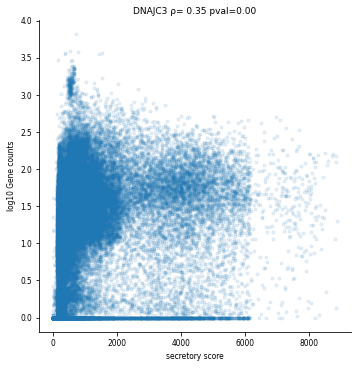

In [50]:
gene_cor("DNAJC3")

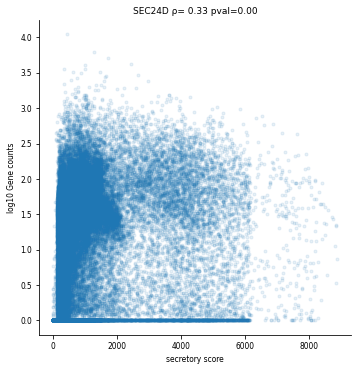

In [51]:
gene_cor("SEC24D")

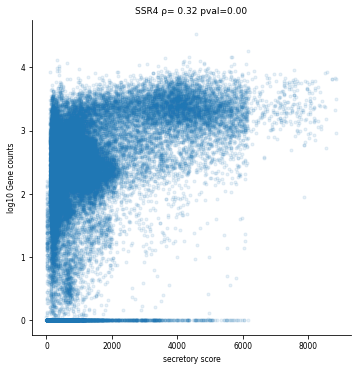

In [52]:
gene_cor("SSR4")

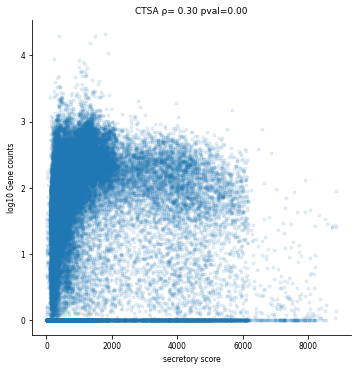

In [53]:
gene_cor("CTSA")

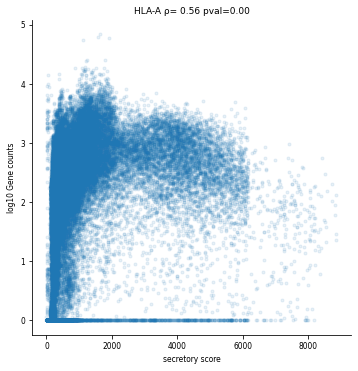

In [54]:
gene_cor("HLA-A")

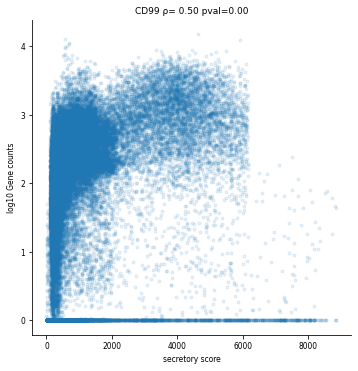

In [55]:
gene_cor("CD99")

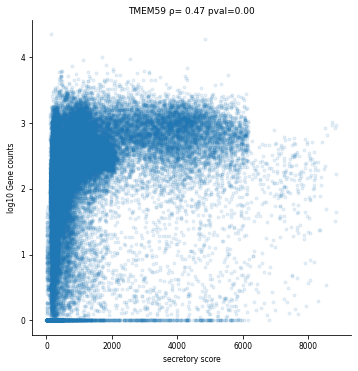

In [56]:
gene_cor("TMEM59")

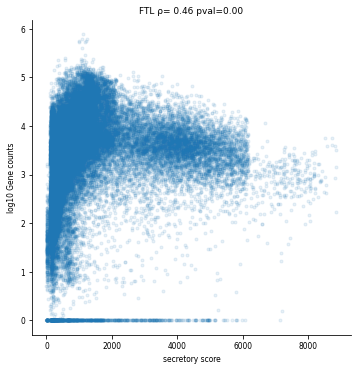

In [57]:
gene_cor("FTL")

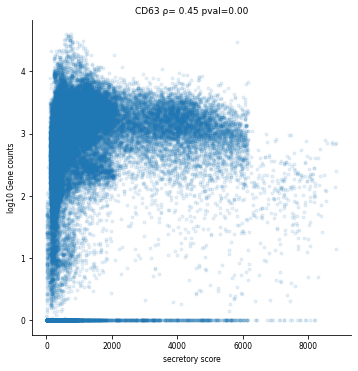

In [58]:
gene_cor("CD63")

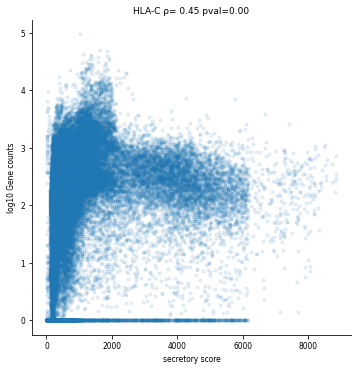

In [59]:
gene_cor("HLA-C")

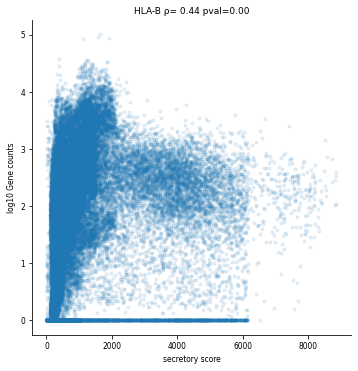

In [60]:
gene_cor("HLA-B")

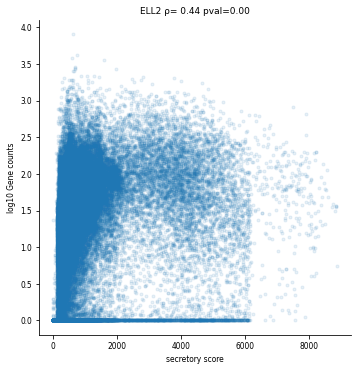

In [61]:
gene_cor("ELL2")

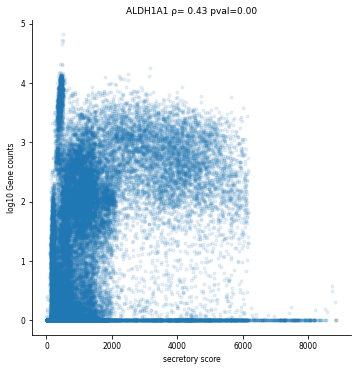

In [62]:
gene_cor("ALDH1A1")

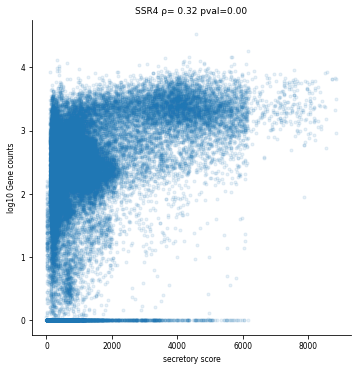

In [63]:
gene_cor("SSR4")

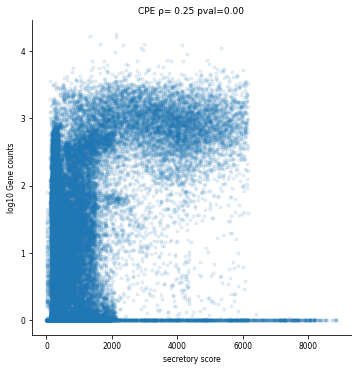

In [64]:
gene_cor("CPE")

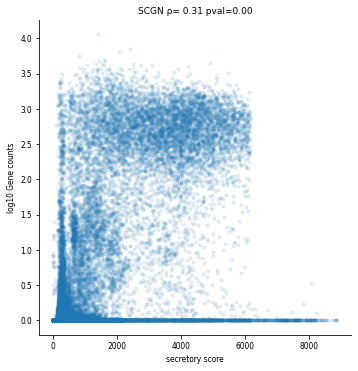

In [65]:
gene_cor("SCGN")

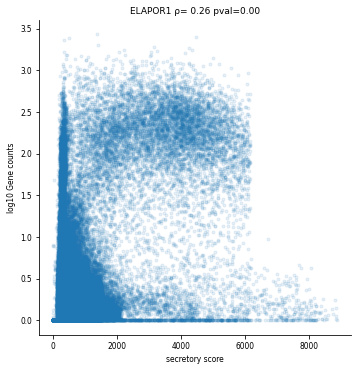

In [66]:
gene_cor("ELAPOR1")

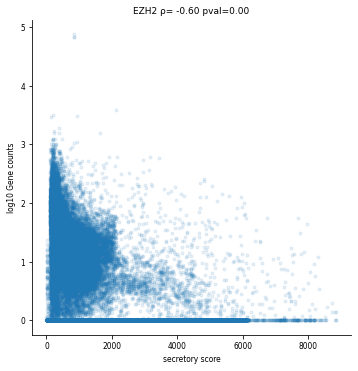

In [67]:
gene_cor("EZH2")

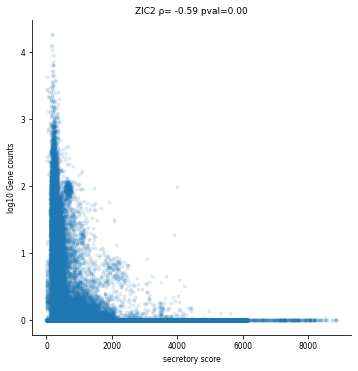

In [68]:
gene_cor("ZIC2")

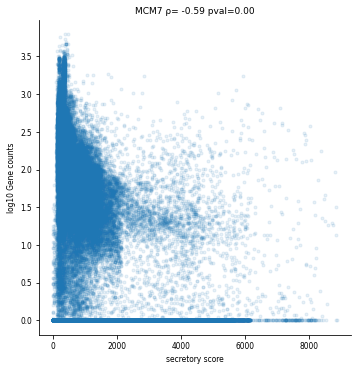

In [69]:
gene_cor("MCM7")

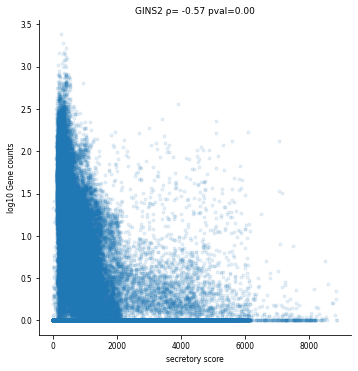

In [70]:
gene_cor("GINS2")

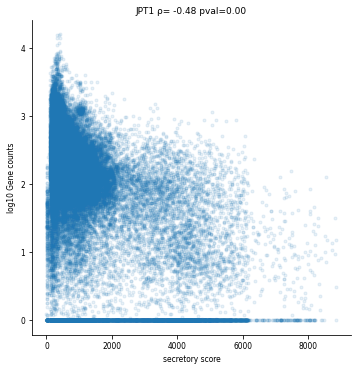

In [71]:
gene_cor("JPT1")

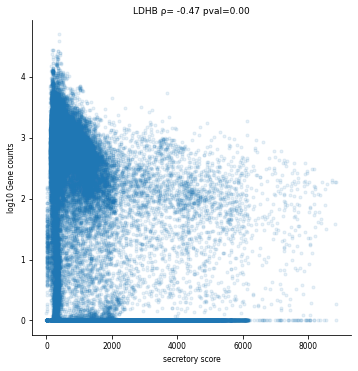

In [72]:
gene_cor("LDHB")

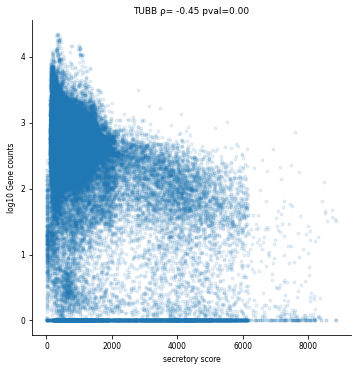

In [73]:
gene_cor("TUBB")

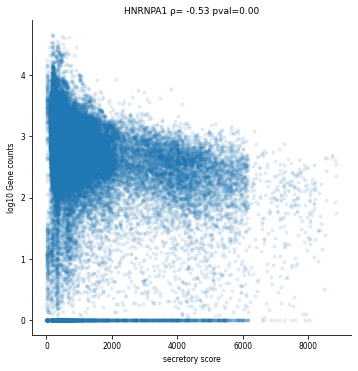

In [74]:
gene_cor("HNRNPA1")

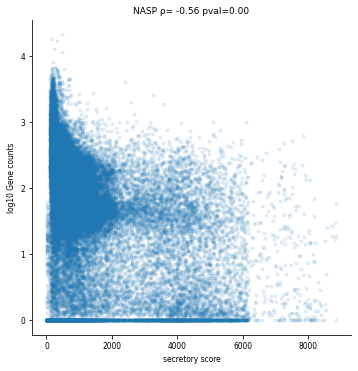

In [75]:
gene_cor("NASP")

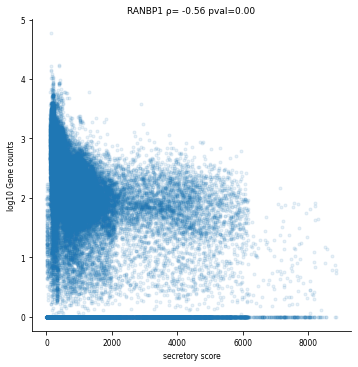

In [76]:
gene_cor("RANBP1")

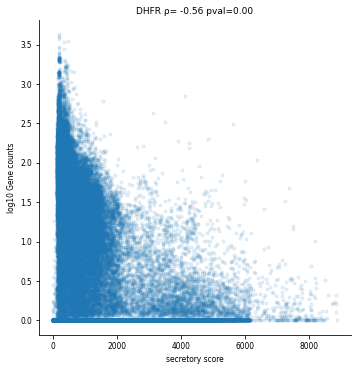

In [77]:
gene_cor("DHFR")

### importing list of secretory pathways genes

In [78]:
secre_path=pd.read_excel("../inputs/EV1.xlsx",header=1)

In [79]:
secre_path=secre_path[["NAME","Subsystem"]]

In [80]:
secre_path.groupby(by="Subsystem").count()

NAME
Subsystem                    
Dolichol pathway           16
ER calcium homeostasis      5
ER glycosylation           15
ER to Golgi Trafficking    40
ERAD                       51
ERADC                      12
ERADL/M                     5
GPI biosynthesis           23
Golgi glycosylation        52
Golgi to ER trafficking    25
Post-Golgi trafficking    103
Protein folding            53
Trafficking regulation    139
Translocation              25
UPR                        24
intra-Golgi trafficking     7

In [81]:
drop=[]
for gene in secre_path["NAME"]:
    if gene not in results.index:
        drop.append(gene)
    

In [82]:
drop

['ALG1L', 'CASP12', 'UFD']

In [83]:
secre_path.set_index("NAME",drop=False,inplace=True)

In [84]:
secre_path.shape

(595, 2)

In [85]:
secre_path.drop(labels=drop,axis=0,inplace=True)

In [86]:
secre_path.shape

(592, 2)

In [87]:
secre_genes=secre_path.index.values

In [88]:
subset_secretory=results.loc[secre_genes].T

In [89]:
subset_secretory

ALG1     ALG10B       ALG11       ALG12       ALG13  \
GSM741172    67.555008   6.754457   11.374541   32.059319   56.900768   
GSM741170    58.676785   8.125086   10.603242   30.204660   58.122894   
GSM741171    77.423752   5.312899    9.868777   33.855591   53.257854   
GSM907015     7.861546   3.562702   10.940756   12.762840   35.285229   
GSM1193921  604.402527  54.733994  105.467453  339.503326  426.594818   
...                ...        ...         ...         ...         ...   
GSM5577336   36.294746   6.787030   37.812576    9.434669  222.578445   
GSM5577337   44.331917   6.450800   40.464794    9.331850  232.045959   
GSM5580099   27.609259   2.768197   11.299513   14.918550   35.161087   
GSM5580100   28.271667   6.120058   10.327983   15.936593   33.098907   
GSM5580102   27.949535   3.208234    9.036556   14.207973   31.645390   

                 ALG14    ALG1L2        ALG2        ALG5        ALG6  ...  \
GSM741172     7.436840  1.205118   25.693741   33.438507   11.668765  ...   
GSM741170    11.446000  1.055281   22.420101   32.350353   14.161101  ...   
GSM741171     5.334246  0.664633   27.929470   39.251011   11.807830  ...   
GSM907015     7.069565  0.242174   26.756710   29.595095   10.645739  ...   
GSM1193921  104.526321  0.000000  476.018433  538.408203  158.996017  ...   
...                ...       ...         ...         ...         ...  ...   
GSM5577336   15.872779  4.470778   39.666206   15.514875   17.130608  ...   
GSM5577337   14.088659  4.024300   40.700340   17.083889   12.259092  ...   
GSM5580099    4.679030  0.951821   26.687531   32.309021    6.791517  ...   
GSM5580100    3.506677  1.991493   24.912334   36.671593    5.042555  ...   
GSM5580102    4.409821  1.584664   29.095787   30.853899    4.407014  ...   

               MAPK10        MAPK8       MAPK9      MBTPS1      MBTPS2  \
GSM741172    0.209219    21.511696   55.261112   51.254818   20.386301   
GSM741170    0.315566    23.526163   45.746853   62.505806   19.104986   
GSM741171    0.292115    19.528742   44.941437   45.789162   18.189554   
GSM907015    0.000000    26.378620   25.315340   30.045597    5.406755   
GSM1193921   0.000000  1384.837158  717.725830  551.787598  122.882416   
...               ...          ...         ...         ...         ...   
GSM5577336  83.478462    34.680813   28.692894  104.315651   11.956158   
GSM5577337  54.210907    34.931522   31.175795  101.792427   13.215544   
GSM5580099   0.827059     9.852377   41.377640   48.938580    8.192971   
GSM5580100   0.000000    15.683266   44.184311   48.737541    8.283486   
GSM5580102   0.000000    12.744954   31.875372   50.328182    9.216592   

                 NFE2L2    PPP1R15A        PREB       TRAF2        XBP1  
GSM741172     80.102119   10.551440   32.145775   73.250923   66.630089  
GSM741170     86.897011    8.306351   34.846386   59.389065   57.257416  
GSM741171     62.453072   16.441891   28.370804   52.725353   78.502525  
GSM907015    123.627502  209.129410   20.785776    9.757392  158.151520  
GSM1193921  1018.086914  612.483093  546.744019  308.626251  529.727112  
...                 ...         ...         ...         ...         ...  
GSM5577336   107.804199  200.303085   36.801472   47.506702   77.232246  
GSM5577337   110.711090  191.407593   33.865967   30.734161   94.087440  
GSM5580099   107.217911   40.094120   46.359692   13.081557  107.701347  
GSM5580100    92.874809   32.454117   51.437748   18.134790  146.917053  
GSM5580102    81.026772   39.043968   48.676414   13.091946  165.058395  

[62408 rows x 592 columns]

In [90]:
subset_secretory.to_csv("../outputs/secretory_pathway_expression.csv")

In [91]:
subset_secretory.set_index(sample_types["cell_type"].values,inplace=True)

In [92]:
subset_secretory

ALG1     ALG10B       ALG11       ALG12       ALG13  \
HELA         67.555008   6.754457   11.374541   32.059319   56.900768   
HELA         58.676785   8.125086   10.603242   30.204660   58.122894   
HELA         77.423752   5.312899    9.868777   33.855591   53.257854   
Macrophage    7.861546   3.562702   10.940756   12.762840   35.285229   
MDAMB231    604.402527  54.733994  105.467453  339.503326  426.594818   
...                ...        ...         ...         ...         ...   
HUVEC        36.294746   6.787030   37.812576    9.434669  222.578445   
HUVEC        44.331917   6.450800   40.464794    9.331850  232.045959   
Macrophage   27.609259   2.768197   11.299513   14.918550   35.161087   
Macrophage   28.271667   6.120058   10.327983   15.936593   33.098907   
Macrophage   27.949535   3.208234    9.036556   14.207973   31.645390   

                 ALG14    ALG1L2        ALG2        ALG5        ALG6  ...  \
HELA          7.436840  1.205118   25.693741   33.438507   11.668765  ...   
HELA         11.446000  1.055281   22.420101   32.350353   14.161101  ...   
HELA          5.334246  0.664633   27.929470   39.251011   11.807830  ...   
Macrophage    7.069565  0.242174   26.756710   29.595095   10.645739  ...   
MDAMB231    104.526321  0.000000  476.018433  538.408203  158.996017  ...   
...                ...       ...         ...         ...         ...  ...   
HUVEC        15.872779  4.470778   39.666206   15.514875   17.130608  ...   
HUVEC        14.088659  4.024300   40.700340   17.083889   12.259092  ...   
Macrophage    4.679030  0.951821   26.687531   32.309021    6.791517  ...   
Macrophage    3.506677  1.991493   24.912334   36.671593    5.042555  ...   
Macrophage    4.409821  1.584664   29.095787   30.853899    4.407014  ...   

               MAPK10        MAPK8       MAPK9      MBTPS1      MBTPS2  \
HELA         0.209219    21.511696   55.261112   51.254818   20.386301   
HELA         0.315566    23.526163   45.746853   62.505806   19.104986   
HELA         0.292115    19.528742   44.941437   45.789162   18.189554   
Macrophage   0.000000    26.378620   25.315340   30.045597    5.406755   
MDAMB231     0.000000  1384.837158  717.725830  551.787598  122.882416   
...               ...          ...         ...         ...         ...   
HUVEC       83.478462    34.680813   28.692894  104.315651   11.956158   
HUVEC       54.210907    34.931522   31.175795  101.792427   13.215544   
Macrophage   0.827059     9.852377   41.377640   48.938580    8.192971   
Macrophage   0.000000    15.683266   44.184311   48.737541    8.283486   
Macrophage   0.000000    12.744954   31.875372   50.328182    9.216592   

                 NFE2L2    PPP1R15A        PREB       TRAF2        XBP1  
HELA          80.102119   10.551440   32.145775   73.250923   66.630089  
HELA          86.897011    8.306351   34.846386   59.389065   57.257416  
HELA          62.453072   16.441891   28.370804   52.725353   78.502525  
Macrophage   123.627502  209.129410   20.785776    9.757392  158.151520  
MDAMB231    1018.086914  612.483093  546.744019  308.626251  529.727112  
...                 ...         ...         ...         ...         ...  
HUVEC        107.804199  200.303085   36.801472   47.506702   77.232246  
HUVEC        110.711090  191.407593   33.865967   30.734161   94.087440  
Macrophage   107.217911   40.094120   46.359692   13.081557  107.701347  
Macrophage    92.874809   32.454117   51.437748   18.134790  146.917053  
Macrophage    81.026772   39.043968   48.676414   13.091946  165.058395  

[62408 rows x 592 columns]

In [93]:
cluster_secretory=subset_secretory.groupby(subset_secretory.index).median()

In [94]:
cluster_secretory

ALG1     ALG10B      ALG11      ALG12      ALG13      ALG14  \
293F         28.991913   7.923062   9.317178  26.485306  45.451962  10.506519   
A431         15.813544   7.325392   7.600866  16.104530  58.972958   7.347570   
A549         32.226761   4.906786   7.370605  12.399176  53.043114   7.158820   
Adipocyte    23.313208   2.752522  12.006680  14.704605  27.763023   9.180340   
Alpha Cell    0.904978   1.655145  16.074926   0.000000  67.654022   2.269704   
...                ...        ...        ...        ...        ...        ...   
T47D         40.249722  11.374743  13.972379  15.392780  31.866447   7.175141   
THP1         22.424799   3.305984  18.426832   8.917710  41.854015   5.581966   
Thymocyte    19.318195   1.440110  11.070491   4.934172   7.074588   6.302230   
Tlymphocyte  10.024399   3.556357  10.198502  11.867290  51.917023   4.039692   
U937         17.232843   3.248092  15.602899  10.229944  45.051922   3.584498   

               ALG1L2       ALG2       ALG5       ALG6  ...     MAPK10  \
293F         0.509062  19.753036  39.547104  19.123686  ...   1.182560   
A431         0.794762  24.230692  29.773817  12.860811  ...   4.953418   
A549         0.450549  29.473503  31.734537   8.808575  ...   1.389847   
Adipocyte    0.896456  29.432785  45.027260   8.369232  ...  10.943468   
Alpha Cell   0.000000   3.421475  22.162621   1.063052  ...  99.312065   
...               ...        ...        ...        ...  ...        ...   
T47D         0.645029  21.312595  37.408562  16.786289  ...   5.881851   
THP1         0.992667  19.283598  51.773987  10.190577  ...   0.376691   
Thymocyte    3.219771   5.367442  26.217148   6.006010  ...   0.000000   
Tlymphocyte  0.842546  15.589437  30.364559  10.615385  ...   0.241310   
U937         1.207525  19.171040  40.011360  13.034723  ...   0.108648   

                 MAPK8      MAPK9      MBTPS1     MBTPS2      NFE2L2  \
293F         40.045845  51.093964   62.616177  17.908356   36.531189   
A431         66.913361  51.922836   66.149704  14.068039   72.686050   
A549         29.670891  43.906624   53.666515  21.956470   67.757782   
Adipocyte    29.780781  31.411657   63.135326  10.194698   67.087067   
Alpha Cell    1.025822   1.254895   21.825319   1.168701   70.649071   
...                ...        ...         ...        ...         ...   
T47D         34.377876  46.792923  150.760590  25.333057   60.045601   
THP1         19.616041  43.327942   43.417927   5.932265  100.603157   
Thymocyte     6.052305   9.982733   13.589270   1.661613   71.828354   
Tlymphocyte  30.766203  30.360607   55.339046   2.486868   78.389717   
U937         32.546539  33.230095   46.968903  12.161882   85.500168   

               PPP1R15A       PREB      TRAF2        XBP1  
293F          41.996986  77.829544  33.248276   94.776779  
A431          34.704468  48.008274  20.008093  104.061104  
A549          31.529396  50.082893  36.218056   60.485268  
Adipocyte     38.298599  49.643616   7.040162  104.771393  
Alpha Cell     6.775570   1.114830   1.099570  116.390625  
...                 ...        ...        ...         ...  
T47D          11.881987  38.892731  29.742607  983.656982  
THP1          21.610062  69.960571  20.153902   97.274872  
Thymocyte      3.782300   5.759573   2.865410   21.032875  
Tlymphocyte  169.742615  22.984217  20.368364  156.832230  
U937          60.327759  76.930679  16.326004  132.894180  

[81 rows x 592 columns]

In [95]:
pd.Series.sort_values(cluster_secretory.loc["Plasma Cell"],ascending=False)

SSR4       2782.414307
HERPUD1    1372.573975
TXNDC5      518.287415
HSP90B1     461.253296
SPCS2       450.803772
              ...     
APPL2         0.000000
MGAT4B        0.000000
MGAT3         0.000000
COG6          0.000000
RAB37         0.000000
Name: Plasma Cell, Length: 592, dtype: float32

In [96]:
pd.Series.sort_values(cluster_secretory.loc["Pancreatic Islet"],ascending=False)

SSR4        1396.365967
HSP90AB1     663.546265
HSP90AA1     641.424438
SRP14        565.992310
SKP1         547.427490
               ...     
AP1S2          0.000000
AP1S1          0.000000
AP1B1          0.000000
RAB36          0.000000
RAB37          0.000000
Name: Pancreatic Islet, Length: 592, dtype: float32

In [97]:
pd.Series.sort_values(cluster_secretory.loc["Hepatocyte"],ascending=False)

PPIA       1571.659546
P4HB       1246.475098
HSPA8      1097.343018
CALR        835.200867
HSP90B1     524.072754
              ...     
ATXN3L        0.000000
WDR38         0.000000
GALNTL5       0.000000
FAM71B        0.000000
UBQLN3        0.000000
Name: Hepatocyte, Length: 592, dtype: float32

In [98]:
pd.Series.sort_values(cluster_secretory.loc["HEK293"],ascending=False)

PPIA        2280.288574
HSPA8       1174.446289
HSP90AA1    1018.511292
HSP90AB1     873.491882
ATF4         642.139404
               ...     
AGR3           0.000000
AGR2           0.000000
PIGY           0.000000
ATXN3L         0.000000
CRYAA          0.000000
Name: HEK293, Length: 592, dtype: float32

In [99]:
sorted_cluster=cluster_secretory.reindex(order)

In [100]:
sorted_cluster.T.loc[secre_path[secre_path["Subsystem"]=="UPR"].index.values]

Plasma Cell  Pancreatic Islet  Chondrocyte  Alpha Cell  Hepatocyte  \
ATF4       104.152008         88.441895   423.506592   65.778625  288.623199   
ATF6         2.105015          0.797423    16.912138   14.214975   13.552299   
ATF6B        4.845220          3.236369    54.418304    4.769414   35.506264   
BCL2         5.942093          0.000000     6.263250    0.000000    0.783161   
DDIT3        4.634265         26.993122    44.217167   25.317825   28.829298   
EIF2AK1      4.750090          2.609385    72.616631   11.544823   72.423355   
EIF2AK2      2.336270          2.931755    27.845940   31.709373   12.156925   
EIF2AK3     18.424652          0.000000    21.737898    0.272640   18.667255   
EIF2AK4     24.079369          5.084848    22.856323   12.806505   26.633936   
EIF2S1       2.128865          2.182326    73.378906   87.101204   80.471710   
ERN1        18.534327          1.520480    10.035666    4.767229    9.638056   
HSPH1        1.121850         14.049741    43.059338  111.896599   45.751633   
MAP2K7       0.637273          0.000000    14.995208    1.181307   16.860661   
MAP3K5       0.138517          0.000000    14.244370    0.048198    4.180190   
MAPK10       0.000000          0.000000    15.823970   99.312065    0.768448   
MAPK8        0.155975          0.000000    32.704494    1.025822   28.947426   
MAPK9        0.175838          0.319391    25.117712    1.254895   21.113783   
MBTPS1       7.920335          6.831249    79.202293   21.825319   42.138935   
MBTPS2       0.000000          0.000000    16.928535    1.168701    9.579627   
NFE2L2      11.734406         21.518196   117.157097   70.649071   65.138817   
PPP1R15A    17.689724         31.291410    43.729298    6.775570   31.018845   
PREB         1.289340          0.000000    29.333509    1.114830   47.154774   
TRAF2        0.000000          0.000000     9.575589    1.099570   12.532079   
XBP1       138.708923        175.823517   175.669281  116.390625  271.062744   

          Granulocyte  Osteoblast   Beta Cell  Hepatic Stellate Cell  \
ATF4       148.727386  427.681732  127.685677             504.038055   
ATF6        25.080509   17.995239   16.853741              17.644030   
ATF6B       79.131744   56.657005    7.787910              65.556778   
BCL2         1.310557    1.165014    0.000000               0.522053   
DDIT3      170.389221   67.975464   35.590801              59.638287   
EIF2AK1     25.960419   63.550060   33.184719              68.911240   
EIF2AK2     21.810379   26.496763   17.218599              22.157467   
EIF2AK3      4.450864   14.324535    3.478210              13.887348   
EIF2AK4     20.408949   40.543362   20.424685              37.747696   
EIF2S1       7.500871  136.773773   64.652573             129.101639   
ERN1        54.076481    6.258842    6.101934               8.572754   
HSPH1        1.690498   58.197395   76.915421              53.587601   
MAP2K7      29.731461   18.047619    1.804578              19.555557   
MAP3K5      45.336899    4.754300    0.508194              10.204901   
MAPK10       1.417648    1.938811   31.830614               7.184323   
MAPK8       19.856773   36.439995    7.017051              42.730000   
MAPK9       13.034103   33.746094    8.464025              30.733845   
MBTPS1      30.250618   79.386894   29.074800              78.598061   
MBTPS2       0.499677   21.140659    4.153247              17.426640   
NFE2L2      94.282272   99.380890   72.513496              96.918304   
PPP1R15A   246.250793   55.584759   11.799800              55.672653   
PREB        13.994468   39.166775   12.813593              47.062401   
TRAF2        7.655016   11.187067    3.044570               9.984241   
XBP1        11.976504  176.017456  142.123917             154.292984   

                NHBE  ...      JURKAT       LNCAP         RKO      Neuron  \
ATF4      296.128937  ...  371.843140  423.752594  372.485382  231.350998   
ATF6       17.932549  ...   13.291100   14.806634   24

In [101]:
def secre_cluster(subsystem,size=(15,11),scale=1,metric="euclidean",method="single"):
    sub_genes=secre_path[secre_path["Subsystem"]==subsystem].index.values
    sub_cluster=sorted_cluster.T.loc[secre_path[secre_path["Subsystem"]==subsystem].index.values]
    plt.rcParams.update({'font.size': 9})
    sns.clustermap(sub_cluster,figsize=size,cmap="Reds",
               dendrogram_ratio=(0.05,0.05),standard_scale=scale,cbar_pos=None,
               metric=metric,col_cluster=False,method=method
              )
    plt.title(subsystem,loc='center')
    plt.savefig(f"../outputs/{subsystem}.svg")

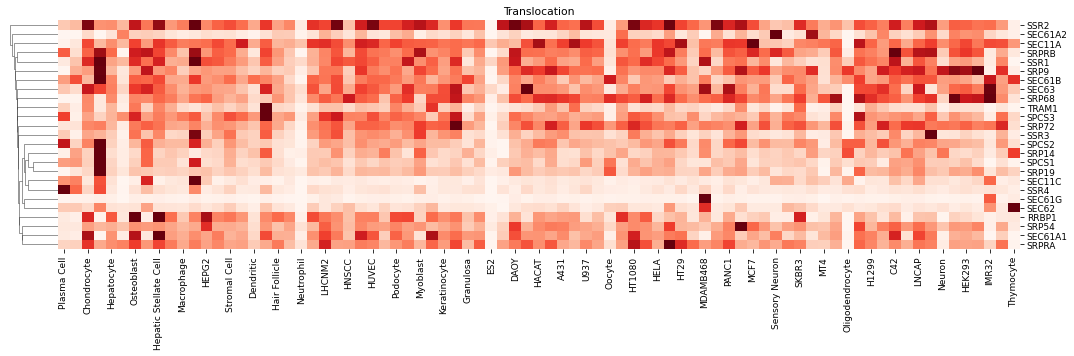

In [102]:
secre_cluster("Translocation",size=(15,5),scale=0,metric="euclidean",method="single")

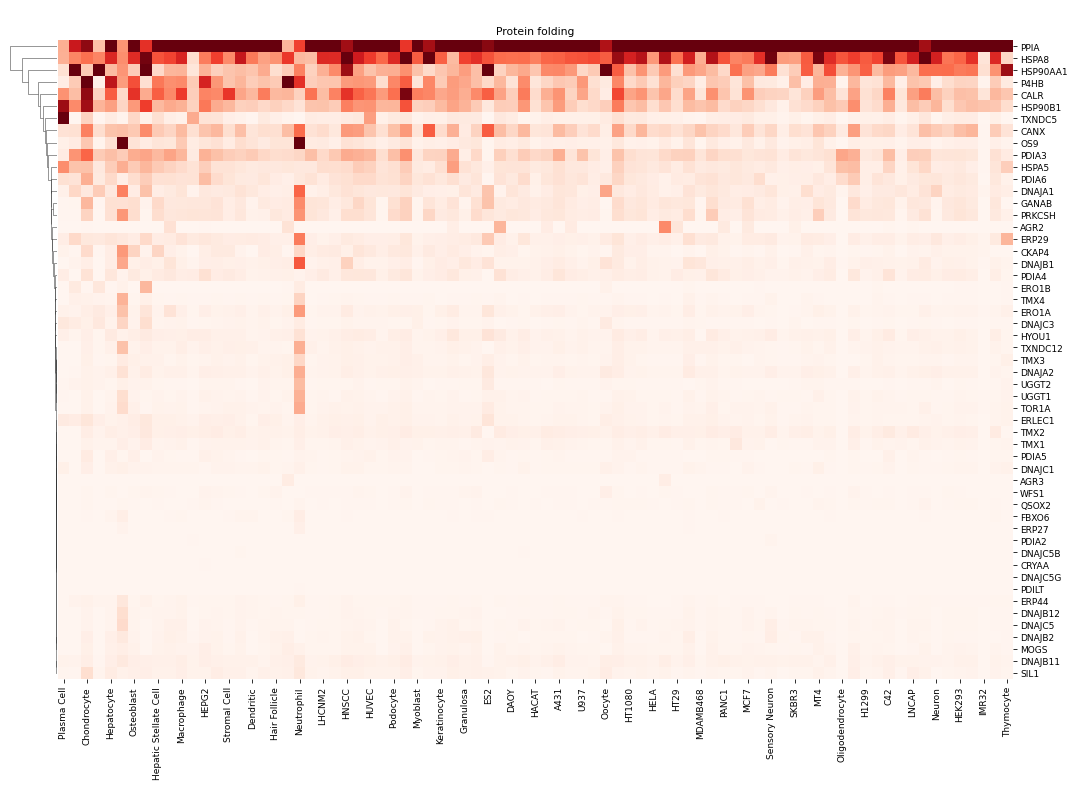

In [103]:
secre_cluster("Protein folding",size=(15,11),scale=1,metric="euclidean",method="single")

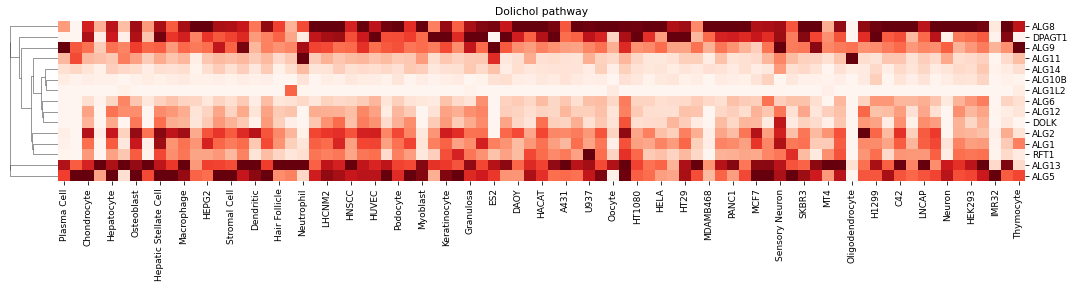

In [104]:
secre_cluster("Dolichol pathway",size=(15,4),scale=1,metric="euclidean",method="single")

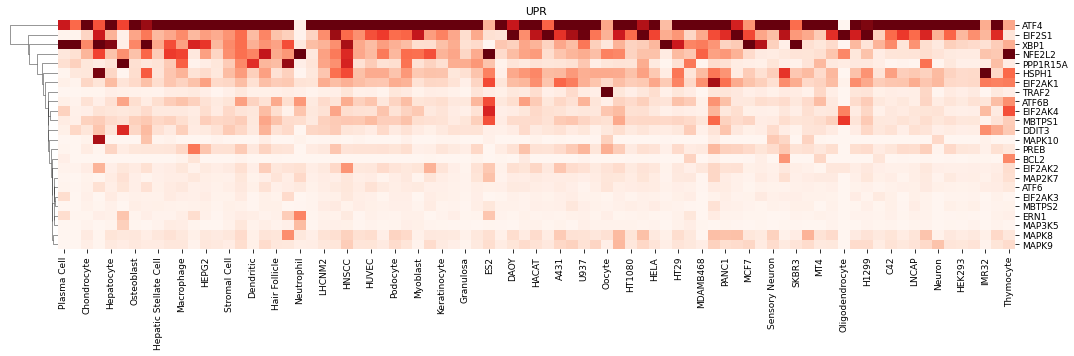

In [105]:
secre_cluster("UPR",size=(15,5),scale=1,metric="euclidean",method="single")

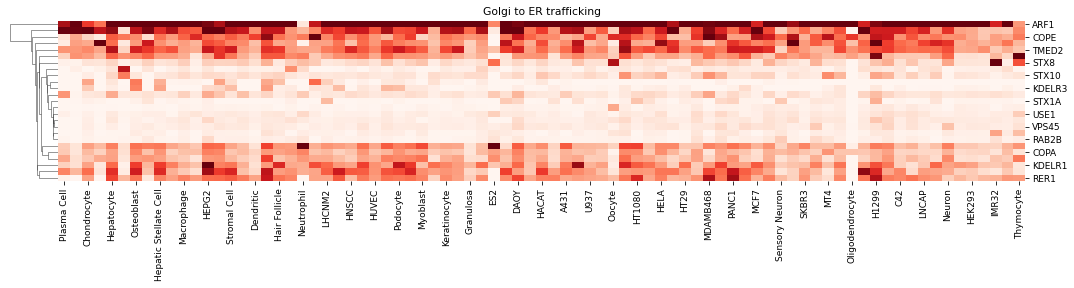

In [106]:
secre_cluster("Golgi to ER trafficking",size=(15,4),scale=1,metric="euclidean",method="single")

In [107]:
#for subsystem in set(secre_path["Subsystem"]):
#    secre_cluster(subsystem)

In [108]:
set(secre_path["Subsystem"])

{'Dolichol pathway',
 'ER calcium\xa0homeostasis',
 'ER glycosylation',
 'ER to Golgi Trafficking',
 'ERAD',
 'ERADC',
 'ERADL/M',
 'GPI biosynthesis',
 'Golgi glycosylation',
 'Golgi to ER trafficking',
 'Post-Golgi trafficking ',
 'Protein folding',
 'Trafficking regulation',
 'Translocation',
 'UPR',
 'intra-Golgi trafficking'}

In [109]:
subset_secretory=results.loc[secre_genes].T

In [110]:
subset_secretory

ALG1     ALG10B       ALG11       ALG12       ALG13  \
GSM741172    67.555008   6.754457   11.374541   32.059319   56.900768   
GSM741170    58.676785   8.125086   10.603242   30.204660   58.122894   
GSM741171    77.423752   5.312899    9.868777   33.855591   53.257854   
GSM907015     7.861546   3.562702   10.940756   12.762840   35.285229   
GSM1193921  604.402527  54.733994  105.467453  339.503326  426.594818   
...                ...        ...         ...         ...         ...   
GSM5577336   36.294746   6.787030   37.812576    9.434669  222.578445   
GSM5577337   44.331917   6.450800   40.464794    9.331850  232.045959   
GSM5580099   27.609259   2.768197   11.299513   14.918550   35.161087   
GSM5580100   28.271667   6.120058   10.327983   15.936593   33.098907   
GSM5580102   27.949535   3.208234    9.036556   14.207973   31.645390   

                 ALG14    ALG1L2        ALG2        ALG5        ALG6  ...  \
GSM741172     7.436840  1.205118   25.693741   33.438507   11.668765  ...   
GSM741170    11.446000  1.055281   22.420101   32.350353   14.161101  ...   
GSM741171     5.334246  0.664633   27.929470   39.251011   11.807830  ...   
GSM907015     7.069565  0.242174   26.756710   29.595095   10.645739  ...   
GSM1193921  104.526321  0.000000  476.018433  538.408203  158.996017  ...   
...                ...       ...         ...         ...         ...  ...   
GSM5577336   15.872779  4.470778   39.666206   15.514875   17.130608  ...   
GSM5577337   14.088659  4.024300   40.700340   17.083889   12.259092  ...   
GSM5580099    4.679030  0.951821   26.687531   32.309021    6.791517  ...   
GSM5580100    3.506677  1.991493   24.912334   36.671593    5.042555  ...   
GSM5580102    4.409821  1.584664   29.095787   30.853899    4.407014  ...   

               MAPK10        MAPK8       MAPK9      MBTPS1      MBTPS2  \
GSM741172    0.209219    21.511696   55.261112   51.254818   20.386301   
GSM741170    0.315566    23.526163   45.746853   62.505806   19.104986   
GSM741171    0.292115    19.528742   44.941437   45.789162   18.189554   
GSM907015    0.000000    26.378620   25.315340   30.045597    5.406755   
GSM1193921   0.000000  1384.837158  717.725830  551.787598  122.882416   
...               ...          ...         ...         ...         ...   
GSM5577336  83.478462    34.680813   28.692894  104.315651   11.956158   
GSM5577337  54.210907    34.931522   31.175795  101.792427   13.215544   
GSM5580099   0.827059     9.852377   41.377640   48.938580    8.192971   
GSM5580100   0.000000    15.683266   44.184311   48.737541    8.283486   
GSM5580102   0.000000    12.744954   31.875372   50.328182    9.216592   

                 NFE2L2    PPP1R15A        PREB       TRAF2        XBP1  
GSM741172     80.102119   10.551440   32.145775   73.250923   66.630089  
GSM741170     86.897011    8.306351   34.846386   59.389065   57.257416  
GSM741171     62.453072   16.441891   28.370804   52.725353   78.502525  
GSM907015    123.627502  209.129410   20.785776    9.757392  158.151520  
GSM1193921  1018.086914  612.483093  546.744019  308.626251  529.727112  
...                 ...         ...         ...         ...         ...  
GSM5577336   107.804199  200.303085   36.801472   47.506702   77.232246  
GSM5577337   110.711090  191.407593   33.865967   30.734161   94.087440  
GSM5580099   107.217911   40.094120   46.359692   13.081557  107.701347  
GSM5580100    92.874809   32.454117   51.437748   18.134790  146.917053  
GSM5580102    81.026772   39.043968   48.676414   13.091946  165.058395  

[62408 rows x 592 columns]

In [111]:
corr_results=[]
for (index,row) in subset_secretory.T.iterrows():
    cval=spearmanr((si.secreted.values+1),(row.values+1))
    corr_results.append(cval)

In [112]:
corr_df=pd.DataFrame(corr_results)
corr_df.index=subset_secretory.columns.values
corr_df.columns=["spearman","pval"]

In [113]:
corr_df

spearman           pval
ALG1     -0.149666  2.132592e-309
ALG10B   -0.291920   0.000000e+00
ALG11    -0.046916   9.315664e-32
ALG12    -0.165898   0.000000e+00
ALG13    -0.180882   0.000000e+00
...            ...            ...
NFE2L2    0.116388  4.117186e-187
PPP1R15A  0.190188   0.000000e+00
PREB     -0.226047   0.000000e+00
TRAF2    -0.259477   0.000000e+00
XBP1      0.185476   0.000000e+00

[592 rows x 2 columns]

In [114]:
corr_df=corr_df.sort_values(by="spearman",ascending=False)

In [115]:
corr_df.head(20)

spearman  pval
DNAJC3    0.348956   0.0
SEC24D    0.330462   0.0
SSR4      0.317508   0.0
CTSA      0.301966   0.0
HERPUD1   0.294132   0.0
RAB1A     0.268740   0.0
RAB3B     0.247118   0.0
OPTN      0.236731   0.0
ERO1B     0.230693   0.0
ERLEC1    0.212684   0.0
SEC62     0.198369   0.0
ARFGAP3   0.190678   0.0
PPP1R15A  0.190188   0.0
XBP1      0.185476   0.0
TMED10    0.177987   0.0
PDIA3     0.172992   0.0
VAMP5     0.172727   0.0
DAD1      0.168696   0.0
DNAJB9    0.167896   0.0
DPP6      0.167357   0.0

In [116]:
corr_df.tail(20)

spearman  pval
PPIA     -0.312096   0.0
PIGX     -0.314908   0.0
UBE2G2   -0.315751   0.0
NET1     -0.317280   0.0
AP3M2    -0.320798   0.0
RNF5     -0.322548   0.0
SNAP47   -0.325371   0.0
LARGE2   -0.327436   0.0
TBC1D7   -0.330376   0.0
HSPA4L   -0.335484   0.0
PIGL     -0.335534   0.0
EIF2AK1  -0.348827   0.0
ALG6     -0.354290   0.0
RAB6B    -0.362138   0.0
UBQLN4   -0.377993   0.0
MAPK9    -0.383016   0.0
B4GALNT1 -0.394870   0.0
DOLPP1   -0.396644   0.0
KIF23    -0.405786   0.0
KIF20A   -0.437178   0.0

In [117]:
corr_df.loc["XBP1"]

spearman    0.185476
pval        0.000000
Name: XBP1, dtype: float64

In [118]:
corr_df[corr_df["pval"]>0.05].index.values

array(['SSR2', 'SSR3', 'RABGEF1', 'COPB1', 'GBGT1', 'ERP29', 'PDIA6',
       'SPCS3', 'HSPA2', 'CRYAA', 'SEC61A1', 'SYVN1', 'RAB44', 'RAB17',
       'ACAP1', 'MICAL1', 'DPM3', 'CRYAB', 'ERP27'], dtype=object)

In [119]:
corr_df["Subsystem"]=""

In [120]:
corr_df

spearman  pval Subsystem
DNAJC3    0.348956   0.0          
SEC24D    0.330462   0.0          
SSR4      0.317508   0.0          
CTSA      0.301966   0.0          
HERPUD1   0.294132   0.0          
...            ...   ...       ...
MAPK9    -0.383016   0.0          
B4GALNT1 -0.394870   0.0          
DOLPP1   -0.396644   0.0          
KIF23    -0.405786   0.0          
KIF20A   -0.437178   0.0          

[592 rows x 3 columns]

In [121]:
for gene in corr_df.index.values:
    corr_df.loc[gene,"Subsystem"]=secre_path.loc[gene]["Subsystem"]

In [122]:
corr_df

spearman  pval                Subsystem
DNAJC3    0.348956   0.0          Protein folding
SEC24D    0.330462   0.0  ER to Golgi Trafficking
SSR4      0.317508   0.0            Translocation
CTSA      0.301966   0.0      Golgi glycosylation
HERPUD1   0.294132   0.0                     ERAD
...            ...   ...                      ...
MAPK9    -0.383016   0.0                      UPR
B4GALNT1 -0.394870   0.0      Golgi glycosylation
DOLPP1   -0.396644   0.0         ER glycosylation
KIF23    -0.405786   0.0   Trafficking regulation
KIF20A   -0.437178   0.0   Trafficking regulation

[592 rows x 3 columns]

In [123]:
corr_df.drop(corr_df[corr_df["pval"]>0.05].index.values,inplace=True)

In [147]:
def corr_heat(subsystem,size=(2,6),font=12,cbar=True):
    sns.set(rc = {'figure.figsize':size},font_scale=1)
    sub_cluster=pd.DataFrame(corr_df[corr_df["Subsystem"]==subsystem]["spearman"].sort_values(ascending=False))
    #plt.rcParams.update({'font.size': 5})
    ax=sns.heatmap(sub_cluster,cmap="coolwarm",cbar=cbar,annot=True,vmin=-1,vmax=1,xticklabels=False)
    #ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = font)
    plt.title(subsystem,loc='center')
    fname = subsystem.replace("/", "_")
    plt.savefig(f"../outputs/{fname}_corr.svg")

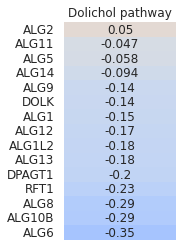

In [148]:
corr_heat("Dolichol pathway",size=(2,4),font=12,cbar=False)

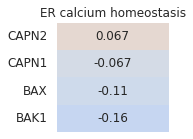

In [149]:
corr_heat("ER calcium\xa0homeostasis",size=(2,2),font=12,cbar=False)

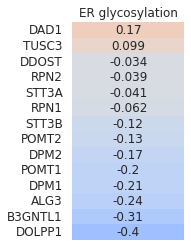

In [150]:
corr_heat("ER glycosylation",size=(2,4),font=12,cbar=False)

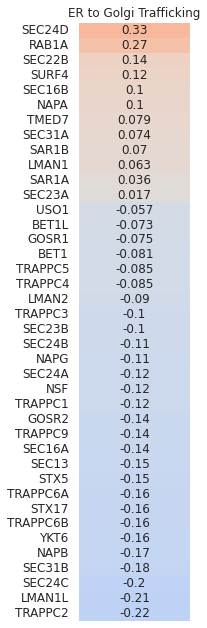

In [151]:
corr_heat("ER to Golgi Trafficking",size=(2,11),font=12,cbar=False)

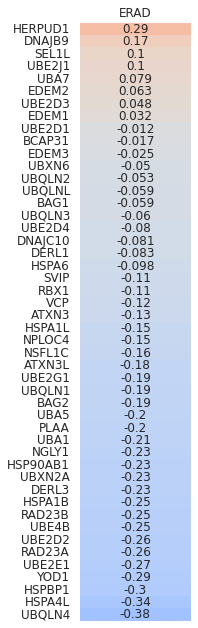

In [152]:
corr_heat("ERAD",size=(2,11),font=12,cbar=False)

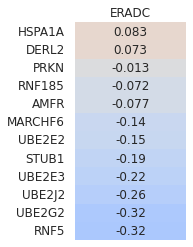

In [153]:
corr_heat("ERADC",size=(2,4),font=12,cbar=False)

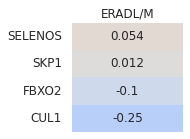

In [154]:
corr_heat("ERADL/M",size=(2,2),font=12,cbar=False)

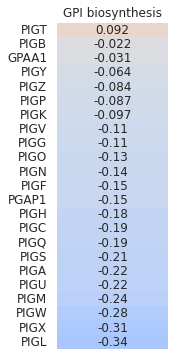

In [155]:
corr_heat("GPI biosynthesis",size=(2,6),font=12,cbar=False)

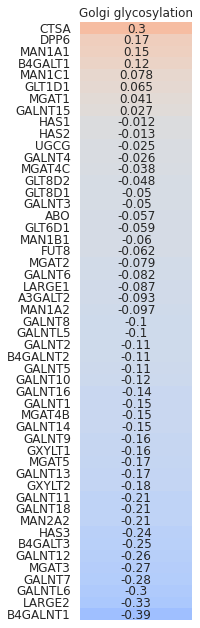

In [156]:
corr_heat("Golgi glycosylation",size=(2,11),font=12,cbar=False)

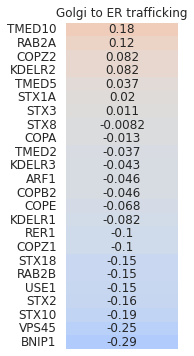

In [157]:
corr_heat("Golgi to ER trafficking",size=(2,6),font=12,cbar=False)

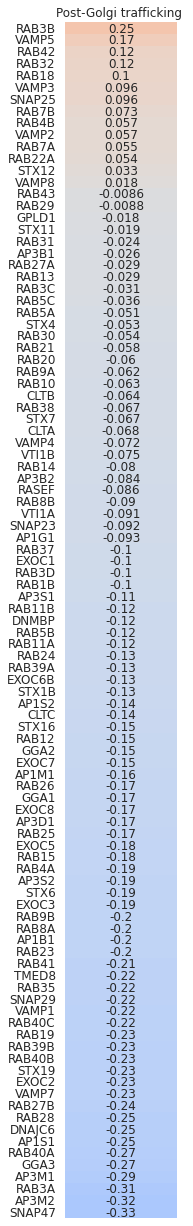

In [158]:
corr_heat("Post-Golgi trafficking ",size=(2,22),font=12,cbar=False)

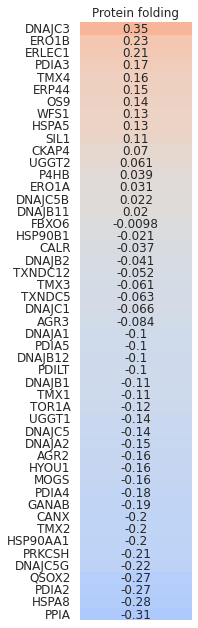

In [159]:
corr_heat("Protein folding",size=(2,11),font=12,cbar=False)

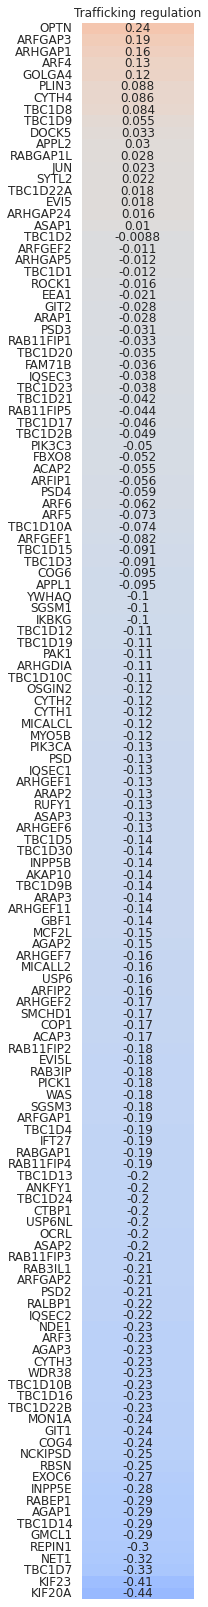

In [160]:
corr_heat("Trafficking regulation",size=(2,29),font=12,cbar=False)

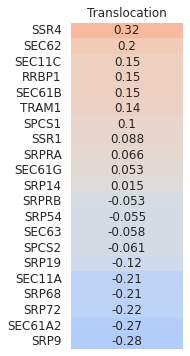

In [161]:
corr_heat("Translocation",size=(2,6),font=12,cbar=False)

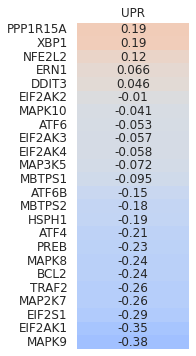

In [162]:
corr_heat("UPR",size=(2,6),font=12,cbar=False)

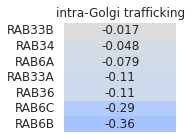

In [163]:
corr_heat("intra-Golgi trafficking",size=(2,2),font=12,cbar=False)

In [164]:
#subset only significantly correlated secretory pathway genes
significant=corr_df[(corr_df["spearman"]<=-0.3)|(corr_df["spearman"]>=0.3)].sort_values(by="spearman",ascending=False)

In [165]:
significant

spearman  pval                Subsystem
DNAJC3    0.348956   0.0          Protein folding
SEC24D    0.330462   0.0  ER to Golgi Trafficking
SSR4      0.317508   0.0            Translocation
CTSA      0.301966   0.0      Golgi glycosylation
GALNTL6  -0.301325   0.0      Golgi glycosylation
B3GNTL1  -0.308465   0.0         ER glycosylation
RAB3A    -0.308774   0.0  Post-Golgi trafficking 
PPIA     -0.312096   0.0          Protein folding
PIGX     -0.314908   0.0         GPI biosynthesis
UBE2G2   -0.315751   0.0                    ERADC
NET1     -0.317280   0.0   Trafficking regulation
AP3M2    -0.320798   0.0  Post-Golgi trafficking 
RNF5     -0.322548   0.0                    ERADC
SNAP47   -0.325371   0.0  Post-Golgi trafficking 
LARGE2   -0.327436   0.0      Golgi glycosylation
TBC1D7   -0.330376   0.0   Trafficking regulation
HSPA4L   -0.335484   0.0                     ERAD
PIGL     -0.335534   0.0         GPI biosynthesis
EIF2AK1  -0.348827   0.0                      UPR
ALG6     -0.354290   0.0         Dolichol pathway
RAB6B    -0.362138   0.0  intra-Golgi trafficking
UBQLN4   -0.377993   0.0                     ERAD
MAPK9    -0.383016   0.0                      UPR
B4GALNT1 -0.394870   0.0      Golgi glycosylation
DOLPP1   -0.396644   0.0         ER glycosylation
KIF23    -0.405786   0.0   Trafficking regulation
KIF20A   -0.437178   0.0   Trafficking regulation

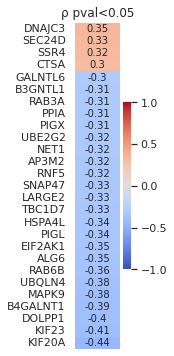

In [166]:
plt.figure(figsize=(1,6))
subset=pd.DataFrame(significant["spearman"])
ax=sns.heatmap(subset,cmap="coolwarm",cbar=True,annot=True,vmin=-1,vmax=1,xticklabels=False,annot_kws={"size": 10})
plt.title("\u03C1 pval<0.05",loc='center')
plt.savefig("../outputs/spearman_03.svg",bbox_inches='tight')

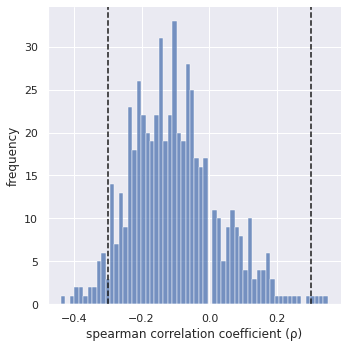

In [167]:
ax=sns.displot(corr_df.spearman,bins=60)
ax.set(xlabel='spearman correlation coefficient (\u03C1)',ylabel="frequency")
plt.axvline(0.3, color="k", linestyle="--")
plt.axvline(-0.3, color="k", linestyle="--")
plt.savefig("../outputs/spearman_dist.svg")

In [168]:
sorted_cluster.T.loc[significant.index.values]

Plasma Cell  Pancreatic Islet  Chondrocyte   Alpha Cell  \
DNAJC3      42.067249         36.782104    45.277351   134.425842   
SEC24D      17.594961         26.120174    97.461334   113.715485   
SSR4      2782.414307       1396.365967   454.340607  1609.666870   
CTSA         0.550430         44.684490   239.861954    33.302082   
GALNTL6      0.000000          0.000000     0.027668     0.000000   
B3GNTL1      0.000000          0.000000     3.717086     0.138917   
RAB3A        0.000000          0.000000     1.074772     0.000000   
PPIA       148.495392        485.614166  1267.005493   407.559204   
PIGX         0.399001          0.877282    14.834961     1.851125   
UBE2G2       5.926375          2.620395    48.431988    29.228500   
NET1         0.000000          0.000000    38.539818    15.818500   
AP3M2        0.000000          0.000000     9.379836     2.370592   
RNF5         0.000000          0.000000    34.911503     2.383187   
SNAP47       0.000000          0.000000    17.704100     1.137084   
LARGE2       0.000000          0.000000     0.043229     0.000000   
TBC1D7       1.484520          0.527237    11.639316     3.571115   
HSPA4L       0.338620          0.756302     5.924546     7.475870   
PIGL         1.046610          0.425876    18.103153     2.208758   
EIF2AK1      4.750090          2.609385    72.616631    11.544823   
ALG6         0.000000          0.000000     6.595164     1.063052   
RAB6B        0.000000          0.000000     1.725357     0.000000   
UBQLN4       0.000000          0.000000    15.947200     0.000000   
MAPK9        0.175838          0.319391    25.117712     1.254895   
B4GALNT1     0.000000          0.000000     3.083966     0.000000   
DOLPP1       0.000000          0.000000     9.036630     0.000000   
KIF23        0.304274          0.000000    12.755624     1.193344   
KIF20A       0.000000          0.000000     9.340100     0.000000   

           Hepatocyte  Granulocyte   Osteoblast   Beta Cell  \
DNAJC3      31.761871    47.322010    35.305729  117.165001   
SEC24D      34.583115    23.751301   133.812683   66.412590   
SSR4       240.546158    23.597172   330.283569  676.157166   
CTSA       199.858063    86.629684   244.433990   41.388691   
GALNTL6      0.033203     0.016806     0.020740    0.000000   
B3GNTL1      4.319115    55.127979     6.985577    0.799734   
RAB3A        1.258024     2.367260     2.576536    0.000000   
PPIA      1571.659546   106.934013  2066.492188  585.580688   
PIGX         9.927016    72.531883    17.902264    5.130851   
UBE2G2      44.598904     9.781688    63.113655   32.886200   
NET1        18.585125     0.898809    21.065063    5.685808   
AP3M2        4.815655     4.604210    21.060169   12.227644   
RNF5        70.538803    15.974577    40.492920   12.851521   
SNAP47      18.041992     3.316092    22.231512    2.634200   
LARGE2       1.312410     0.855892     0.009408    0.996061   
TBC1D7      17.514439    18.029680    27.117954    6.476570   
HSPA4L       7.997056     0.875192     2.942087    6.342964   
PIGL        24.934975    18.067892    21.258856   13.008206   
EIF2AK1     72.423355    25.960419    63.550060   33.184719   
ALG6         6.994807     9.220146     9.985989    4.371790   
RAB6B        4.067480     0.041229     3.604321    1.058436   
UBQLN4      18.383736     0.987558    20.100582    0.258035   
MAPK9       21.113783    13.034103    33.746094    8.464025   
B4GALNT1     1.061675     0.000000     3.735697    0.000000   
DOLPP1      14.914846     0.669555    13.253090    0.215398   
KIF23        2.635251     3.060939    20.747044    1.045594   
KIF20A       1.434084     0.282585    14.085388    0.000000   

          Hepatic Stellate Cell         NHBE  ...       JURKAT        LNCAP  \
DNAJC3                28.459728    32.670776  ...     8.714480    22.175112   
SEC24D               134.768692    36.786915  ...     9.684285    20.508444   
SSR4                 379.838623   284.143005  ...   268.590790   371.405640

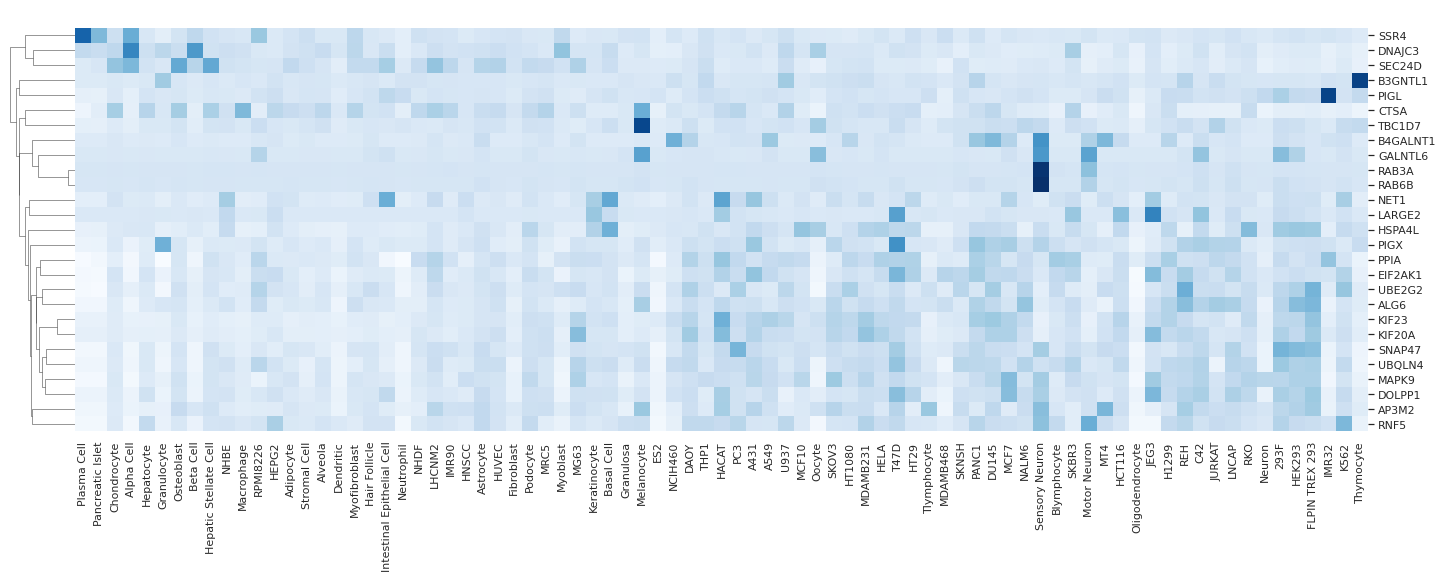

In [169]:
plt.rcParams.update({'font.size': 5})
sns.clustermap(sorted_cluster.T.loc[significant.index.values],figsize=(20,8),cmap="Blues",
               dendrogram_ratio=(0.05,0.05),z_score=0,cbar_pos=None,
               metric="euclidean",col_cluster=False,method="average"
              )
plt.savefig("../outputs/significant_03_cluster.svg",bbox_inches='tight')

In [172]:
sample_types.shape

(62408, 3)

In [173]:
sample_types.head()

percentage   cell_type          SI
GSM741172     4.511082        HELA   451.10815
GSM741170     4.583831        HELA   458.38312
GSM741171     4.867313        HELA   486.73130
GSM907015    14.701526  Macrophage  1470.15260
GSM1193921    2.805667    MDAMB231   280.56674

In [174]:
#getting GSM ID from each cell type
samples={}
for c_type in set(sample_types.cell_type.values):
    samples[c_type]=sample_types[sample_types["cell_type"]==c_type].index.values

In [175]:
samples.keys()

dict_keys(['Blymphocyte', 'A431', 'ES2', 'HNSCC', 'Neutrophil', 'MDAMB231', 'IMR32', 'Macrophage', 'RKO', 'Alpha Cell', 'Beta Cell', 'Basal Cell', 'HT29', 'Melanocyte', 'Granulosa', 'RPMI8226', 'A549', 'FLPIN TREX 293', 'HT1080', 'IMR90', 'NHDF', 'Osteoblast', 'DU145', 'Alveola', 'Oocyte', 'PC3', 'Chondrocyte', 'Granulocyte', 'SKBR3', 'Hair Follicle', 'PANC1', 'Astrocyte', 'Podocyte', 'HCT116', 'Dendritic', 'NCIH460', '293F', 'MDAMB468', 'NHBE', 'MCF7', 'Myoblast', 'U937', 'MG63', 'Plasma Cell', 'C42', 'LHCNM2', 'LNCAP', 'Motor Neuron', 'MRC5', 'NALM6', 'Hepatic Stellate Cell', 'Intestinal Epithelial Cell', 'Tlymphocyte', 'T47D', 'Adipocyte', 'MCF10', 'SKNSH', 'Stromal Cell', 'Oligodendrocyte', 'SKOV3', 'Fibroblast', 'H1299', 'K562', 'Keratinocyte', 'HEPG2', 'HEK293', 'HUVEC', 'REH', 'Neuron', 'JURKAT', 'HACAT', 'Sensory Neuron', 'MT4', 'THP1', 'HELA', 'Pancreatic Islet', 'Thymocyte', 'Hepatocyte', 'JEG3', 'DAOY', 'Myofibroblast'])

In [176]:
len(samples["Oocyte"])

139

In [177]:
len(samples["ES2"])

563

In [178]:
len(samples["SKOV3"])

79

In [179]:
len(samples["Granulosa"])

112

In [180]:
ovary_cells=list(samples["Oocyte"])+list(samples["ES2"])+list(samples["SKOV3"])+list(samples["Granulosa"])

In [181]:
len(ovary_cells)

893

In [183]:
pd.DataFrame(list(samples["Plasma Cell"])).to_csv("../outputs/plasma_cell.csv",index=None)

In [184]:
pd.DataFrame(list(samples["HEK293"])).to_csv("../outputs/HEK293.csv",index=None)

In [185]:
pd.DataFrame(list(samples["Alpha Cell"])).to_csv("../outputs/alpha_cell.csv",index=None)

In [186]:
pd.DataFrame(list(samples["Thymocyte"])).to_csv("../outputs/thymocyte.csv",index=None)

In [187]:
pd.DataFrame(list(samples["Pancreatic Islet"])).to_csv("../outputs/pancreatic.csv",index=None)

In [188]:
pd.DataFrame(ovary_cells).to_csv("../outputs/ovary_cells_v10.csv",index=None)

In [189]:
ovary_cells=pd.read_csv("../outputs/ovary_cells_v10.csv")

In [190]:
total_depth=results.sum(axis=0)

In [191]:
def max_trans(cell_query):
    mean=((results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100).mean(axis=1)
    median=((results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100).median(axis=1)
    mad=((results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100).mad(axis=1)
    df=pd.DataFrame(mean,columns=["mean"])
    df["median"]=median
    df["mad"]=mad
    return df.sort_values(by="mean",ascending=False)

In [192]:
plasma=max_trans("Plasma Cell")

In [193]:
plasma.head(10)

mean     median        mad
IGKC      11.605271  13.993358  10.600442
IGLC2      8.555785   0.031240  11.460039
IGKJ2      3.823569   0.000000   6.288269
IGKJ4      3.647002   0.000000   6.003378
IGKJ1      3.003703   0.000000   4.991242
IGLV2-14   2.566689   0.000000   4.603127
IGHJ5      2.430748   0.000000   3.874617
IGLV1-40   2.429919   0.000000   4.447707
IGLC3      2.282450   0.015420   3.649214
IGLV1-44   2.231380   0.000000   4.070321

In [194]:
list(plasma["mean"][0:4].index.values)

['IGKC', 'IGLC2', 'IGKJ2', 'IGKJ4']

In [195]:
ab_table=max_trans("Plasma Cell")
sizes=list(ab_table["mean"][0:5])+[ab_table["mean"][5:].sum()]
other="other \n%s" %ab_table["mean"][5:].sum()

In [196]:
other

'other \n69.36467'

In [197]:
def prot_abundance(cell_type):
    plt.figure(figsize=(10,3))
    ab_table=max_trans(cell_type)
    sizes=list(ab_table["mean"][0:5])+[ab_table["mean"][5:].sum()]
    other=["other %.2f%%" %ab_table["mean"][5:].sum()]
    label=list(ab_table["mean"][0:5].index.values)+other
    color=['red','blue','green','pink','orange','grey']
    squarify.plot(sizes=sizes, label=label,color=color, alpha=0.3, text_kwargs={'fontsize':14})
    plt.axis('off')
    name=cell_type + "_abundance.svg"
    plt.savefig(f"../outputs/{name}")
    plt.show()

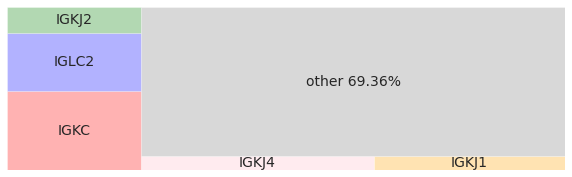

In [198]:
prot_abundance("Plasma Cell")

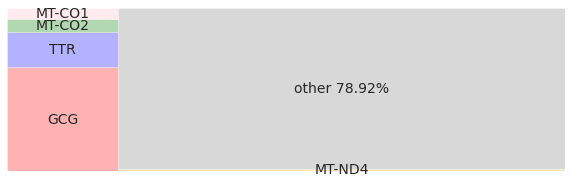

In [199]:
prot_abundance("Alpha Cell")

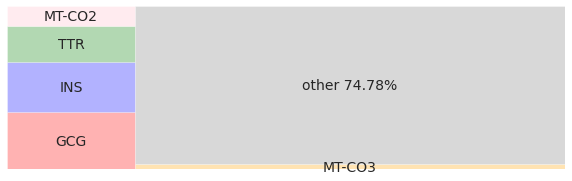

In [200]:
prot_abundance("Pancreatic Islet")

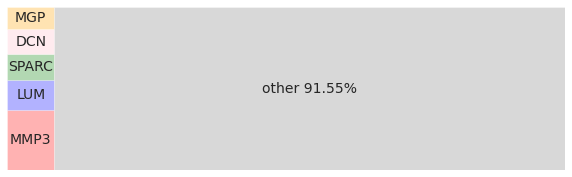

In [201]:
prot_abundance("Chondrocyte")

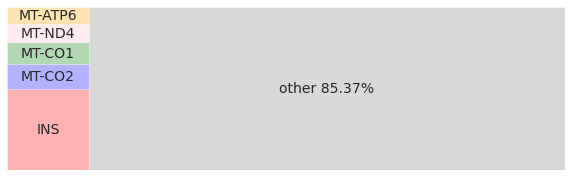

In [202]:
prot_abundance("Beta Cell")

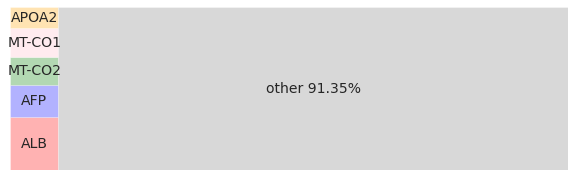

In [203]:
prot_abundance("Hepatocyte")

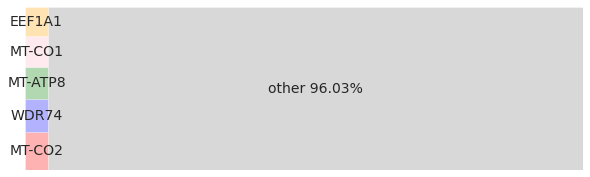

In [204]:
prot_abundance("HEK293")

In [205]:
plt.rcParams['figure.figsize'] = [8.0, 6.0]

In [206]:
def gene_cell_dist(cell_type,gene):
    cell_query=cell_type
    percentage=(results.loc[:,results.columns.isin(list(samples[cell_query]))]/results.loc[:,results.columns.isin(list(samples[cell_query]))].sum(axis=0))*100
    percentage.loc[gene].hist(bins=100)

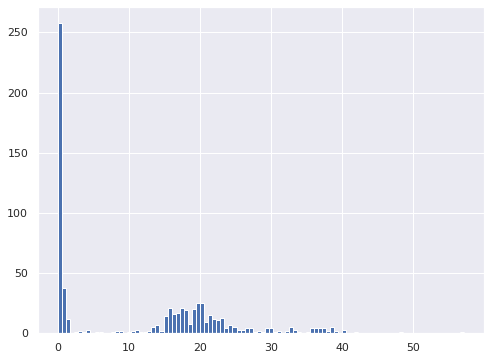

In [207]:
gene_cell_dist("Plasma Cell","IGKC")

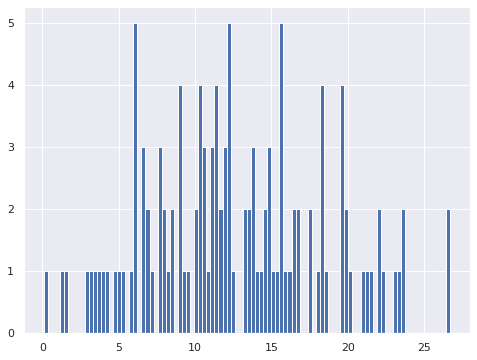

In [208]:
gene_cell_dist("Alpha Cell","GCG")

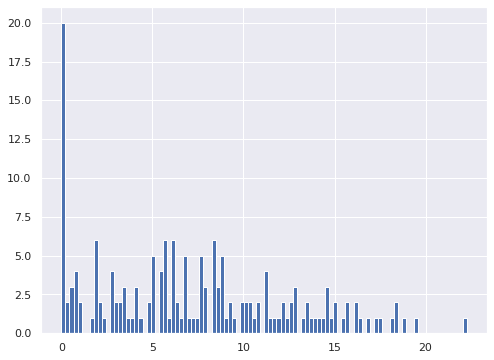

In [209]:
gene_cell_dist("Beta Cell","INS")

In [210]:
def top_genes(cell_type,number):
    return max_trans(cell_type).sort_values(by="mean",ascending=False).head(number)["mean"]

In [211]:
top_genes("Plasma Cell",5).sum()

30.63533

In [212]:
top_genes("Alpha Cell",5).sum()

21.082611

In [213]:
top_genes("Pancreatic Islet",5).sum()

25.2247

In [214]:
top_genes("Chondrocyte",5).sum()

8.452797

In [215]:
top_genes("Beta Cell",5).sum()

14.632638

In [216]:
top_genes("Hepatocyte",5).sum()

8.648664

In [217]:
top_genes("HEK293",5).sum()

3.9721885

In [218]:
top_genes("Plasma Cell",5)

IGKC     11.605271
IGLC2     8.555785
IGKJ2     3.823569
IGKJ4     3.647002
IGKJ1     3.003703
Name: mean, dtype: float32

In [219]:
top_genes("Alpha Cell",5)

GCG       12.634053
TTR        4.274716
MT-CO2     1.592139
MT-CO1     1.400529
MT-ND4     1.181173
Name: mean, dtype: float32

In [220]:
top_genes("Beta Cell",5)

INS        7.213688
MT-CO2     2.296497
MT-CO1     1.914843
MT-ND4     1.622450
MT-ATP6    1.585160
Name: mean, dtype: float32

In [221]:
top_genes("Pancreatic Islet",5)

GCG       7.979539
INS       7.129680
TTR       4.933769
MT-CO2    2.818068
MT-CO3    2.363645
Name: mean, dtype: float32

In [222]:
top_genes("Hepatocyte",5)

ALB       2.814337
AFP       1.674026
MT-CO2    1.519451
MT-CO1    1.519131
APOA2     1.121719
Name: mean, dtype: float32

In [223]:
top_genes("HEK293",5)

MT-CO2     0.924140
WDR74      0.807090
MT-ATP8    0.781013
MT-CO1     0.736634
EEF1A1     0.723312
Name: mean, dtype: float32

In [224]:
top_genes("Adipocyte",5)

EEF1A1    1.146381
MT-CO1    0.865273
SPARC     0.802136
FABP4     0.791654
FTH1      0.764862
Name: mean, dtype: float32

In [225]:
def top_genes(cell_type):
    return max_trans(cell_type).sort_values(by="mean",ascending=False).head(5)

In [226]:
top_genes("Hepatocyte")

mean    median       mad
ALB     2.814337  1.667134  2.186920
AFP     1.674026  0.001293  2.634458
MT-CO2  1.519451  1.416250  0.739782
MT-CO1  1.519131  1.367993  0.799489
APOA2   1.121719  0.408897  1.208761

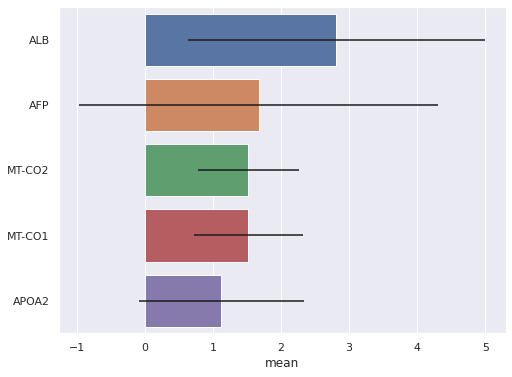

In [227]:
hep=top_genes("Hepatocyte")
ax = sns.barplot(x="mean", y=hep.index.values,data=hep,xerr=hep["mad"], capsize=1)

In [228]:
sample_types.head()

percentage   cell_type          SI
GSM741172     4.511082        HELA   451.10815
GSM741170     4.583831        HELA   458.38312
GSM741171     4.867313        HELA   486.73130
GSM907015    14.701526  Macrophage  1470.15260
GSM1193921    2.805667    MDAMB231   280.56674

In [229]:
sample_types.shape

(62408, 3)

In [230]:
sample_types.loc["GSM741172","cell_type"]

'HELA'

In [231]:
sample_types.loc[sample_types.cell_type=="Plasma Cell"].sort_values(by="percentage",ascending=False)

percentage    cell_type         SI
GSM3350577   88.582770  Plasma Cell  8858.2770
GSM2197433   88.325290  Plasma Cell  8832.5280
GSM3350601   88.290090  Plasma Cell  8829.0090
GSM2197432   88.244880  Plasma Cell  8824.4880
GSM3350618   88.022575  Plasma Cell  8802.2580
...                ...          ...        ...
GSM4419546   28.245476  Plasma Cell  2824.5476
GSM4565594   28.182550  Plasma Cell  2818.2551
GSM3351115   27.289284  Plasma Cell  2728.9285
GSM4419567   27.163961  Plasma Cell  2716.3962
GSM4643265   27.139235  Plasma Cell  2713.9233

[680 rows x 3 columns]

In [232]:
sample_types.sort_values(by="percentage",ascending=False).head(10)

percentage    cell_type        SI
GSM3350577   88.582770  Plasma Cell  8858.277
GSM2197433   88.325290  Plasma Cell  8832.528
GSM3350601   88.290090  Plasma Cell  8829.009
GSM2197432   88.244880  Plasma Cell  8824.488
GSM3350618   88.022575  Plasma Cell  8802.258
GSM2197434   87.237946  Plasma Cell  8723.795
GSM2171215   87.135230  Plasma Cell  8713.523
GSM2197431   85.720730  Plasma Cell  8572.073
GSM3350606   85.482080  Plasma Cell  8548.208
GSM3350605   85.236120  Plasma Cell  8523.612

In [233]:
#only to normalize
#x=np.asarray(secre_cell_type2.values)
#scaler=preprocessing.MinMaxScaler()
#x_scaled=scaler.fit_transform(x)
#secre_cell_type2=pd.DataFrame(x_scaled)

In [234]:
sample_types.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False)

cell_type
Plasma Cell         57.793634
Pancreatic Islet    29.157193
Chondrocyte         27.233430
Alpha Cell          22.362631
Hepatocyte          21.808576
                      ...    
HEK293               1.849199
FLPIN TREX 293       1.844019
IMR32                1.785176
K562                 1.753976
Thymocyte            1.212715
Name: percentage, Length: 81, dtype: float64

In [235]:
my_order = sample_types.groupby(by=["cell_type"])["percentage"].median().sort_values(ascending=False).index

In [236]:
percentage=0.2

In [237]:
top_percent=int(len(sample_types)*percentage)

In [238]:
top_percent

12481

In [239]:
high_producers=sample_types[sample_types["cell_type"]=="Plasma Cell"]

In [240]:
low_producers=sample_types[sample_types["cell_type"]=="HEK293"]

In [241]:
high_producers=sample_types.sort_values(by="percentage",ascending=False).iloc[0:top_percent]

In [242]:
low_producers=sample_types.sort_values(by="percentage",ascending=False).iloc[-top_percent:]

In [243]:
high_producers

percentage         cell_type         SI
GSM3350577   88.582770       Plasma Cell  8858.2770
GSM2197433   88.325290       Plasma Cell  8832.5280
GSM3350601   88.290090       Plasma Cell  8829.0090
GSM2197432   88.244880       Plasma Cell  8824.4880
GSM3350618   88.022575       Plasma Cell  8802.2580
...                ...               ...        ...
GSM2343354   13.843385             HEPG2  1384.3385
GSM1925966   13.843052        Macrophage  1384.3052
GSM3416570   13.841951        Neutrophil  1384.1952
GSM5088607   13.840850        Fibroblast  1384.0850
GSM2174395   13.840322  Pancreatic Islet  1384.0322

[12481 rows x 3 columns]

In [244]:
low_producers

percentage   cell_type          SI
GSM4779278    2.332873      HCT116  233.287340
GSM1620519    2.332818       MCF10  233.281750
GSM2885005    2.332740      Neuron  233.274050
GSM4501048    2.332606        MCF7  233.260600
GSM3497855    2.332593      HEK293  233.259320
...                ...         ...         ...
GSM4776218    0.019147  Fibroblast    1.914654
GSM2071351    0.015702     NCIH460    1.570199
GSM4776266    0.013098  Fibroblast    1.309766
GSM2071350    0.010780     NCIH460    1.077986
GSM1435509    0.000947  Fibroblast    0.094710

[12481 rows x 3 columns]

In [245]:
high_producers.to_csv("../outputs/high_producers_v11_20_TPM.csv")

In [246]:
low_producers.to_csv("../outputs/low_producers_v11_20_TPM.csv")

In [247]:
results.head()

GSM741172   GSM741170  GSM741171   GSM907015  GSM1193921  GSM1098188  \
A1BG      1.514984    1.316501   0.945544   12.863701   71.141045    0.738105   
A1CF      0.208822    0.199274   0.138544    0.058604    0.301775    0.034464   
A2M      61.154045  141.594360  62.881958  109.156868    0.000000  313.137146   
A2ML1     0.373835    0.262869   0.266668    0.799892    0.655797    0.109945   
A3GALT2   0.722773    1.094620   0.645631    0.000000    0.000000    0.458957   

         GSM1193928  GSM1048186  GSM1216828  GSM1241249  ...  GSM5572862  \
A1BG     134.292114   10.272301    2.855723    0.000000  ...    0.778685   
A1CF       1.374310    0.267306   13.903001    0.000000  ...    0.163493   
A2M        0.000000  216.393066   22.510412    0.000000  ...    0.000000   
A2ML1      0.366945    4.065595    0.190527    1.748747  ...    0.112173   
A3GALT2    0.000000    4.969500    0.000000    0.000000  ...    0.000000   

         GSM5577332  GSM5577333  GSM5577334  GSM5577335  GSM5577336  \
A1BG       6.074946    6.227352    5.103860    8.809099    7.493229   
A1CF       0.129097    0.266828    0.162259    0.165147    0.261044   
A2M        0.130720    0.426572    0.000000    0.507422    0.200596   
A2ML1      1.403640    2.326312    2.850472    3.334096    3.415315   
A3GALT2    0.457722    0.104935    0.179656    0.000000    0.313955   

         GSM5577337  GSM5580099  GSM5580100  GSM5580102  
A1BG       7.746690   42.761230   35.295048   35.235378  
A1CF       0.246418    0.013703    0.031029    0.020903  
A2M        0.000000  314.406342  426.812805  311.372803  
A2ML1      2.629406    0.064991    0.255675    0.041696  
A3GALT2    0.304647    0.000000    0.000000    0.151392  

[5 rows x 62408 columns]

In [248]:
somatome=results.drop(secretome_included).copy()

In [249]:
somatome.head()

GSM741172  GSM741170  GSM741171  GSM907015  GSM1193921  GSM1098188  \
A1CF      0.208822   0.199274   0.138544   0.058604    0.301775    0.034464   
A3GALT2   0.722773   1.094620   0.645631   0.000000    0.000000    0.458957   
A4GALT   36.032150  37.229839  33.279217   1.015697  142.980347   36.433231   
A4GNT     0.030812   0.000000   0.000000   1.430780    0.492563    0.048803   
AAAS     53.506466  53.790775  47.527954  25.903215  273.925598   45.429768   

         GSM1193928  GSM1048186  GSM1216828  GSM1241249  ...  GSM5572862  \
A1CF       1.374310    0.267306   13.903001    0.000000  ...    0.163493   
A3GALT2    0.000000    4.969500    0.000000    0.000000  ...    0.000000   
A4GALT   183.780090   10.563320    2.462949    0.701296  ...   18.059050   
A4GNT      0.495588    0.000000    0.030563    0.000000  ...    0.000000   
AAAS     232.081818   51.678558   29.881355   19.422600  ...   42.163074   

         GSM5577332  GSM5577333  GSM5577334  GSM5577335  GSM5577336  \
A1CF       0.129097    0.266828    0.162259    0.165147    0.261044   
A3GALT2    0.457722    0.104935    0.179656    0.000000    0.313955   
A4GALT     5.627535    7.101623    7.093668    7.457928    5.663228   
A4GNT      0.080976    0.055640    0.047948    0.247546    0.278913   
AAAS     101.262016   90.680084   89.193260  108.643570  118.603142   

         GSM5577337  GSM5580099  GSM5580100  GSM5580102  
A1CF       0.246418    0.013703    0.031029    0.020903  
A3GALT2    0.304647    0.000000    0.000000    0.151392  
A4GALT     7.826350    0.033709    0.000000    0.000000  
A4GNT      0.000000    0.389952    0.440706    0.318720  
AAAS     114.563354   43.215916   49.570923   31.762648  

[5 rows x 62408 columns]

In [250]:
somatome.shape

(18952, 62408)

In [251]:
corr_results_somatome=[]
for (index,row) in somatome.iterrows():
    cval=spearmanr((si.secreted.values+1),(row.values+1))
    corr_results_somatome.append(cval)

/zhome/89/0/75762/manuel/DeepSecret/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [252]:
corr_df_somatome=pd.DataFrame(corr_results_somatome)
corr_df_somatome.index=somatome.index.values
corr_df_somatome.columns=["spearman","pval"]

In [253]:
corr_df_somatome.sort_values(by="spearman",ascending=False).head(10)

spearman  pval
HLA-A    0.559050   0.0
CD99     0.496565   0.0
TMEM59   0.471806   0.0
FTL      0.461971   0.0
CD63     0.451413   0.0
HLA-C    0.447098   0.0
HLA-B    0.443458   0.0
ELL2     0.441560   0.0
ALDH1A1  0.426227   0.0
RIN2     0.413556   0.0

In [254]:
corr_df_somatome.sort_values(by="spearman",ascending=False).tail(10)

spearman  pval
BIRC5   -0.552805   0.0
CENPU   -0.555294   0.0
DHFR    -0.560308   0.0
RANBP1  -0.560413   0.0
NASP    -0.561892   0.0
GINS2   -0.574005   0.0
MCM7    -0.585378   0.0
ZIC2    -0.588736   0.0
EZH2    -0.595871   0.0
MIR4485       NaN   NaN

In [255]:
corr_df_somatome.sort_values(by="spearman",ascending=False).to_csv("../outputs/spearman_somatosome.csv")

In [256]:
corr_df.sort_values(by="spearman",ascending=False).to_csv("../outputs/spearman_secre_pathway.csv")

In [257]:
#subset only significantly correlated secretory pathway genes
significant_somatome=corr_df_somatome[(corr_df_somatome["spearman"]<=-0.5)|(corr_df_somatome["spearman"]>=0.5)].sort_values(by="spearman",ascending=False)

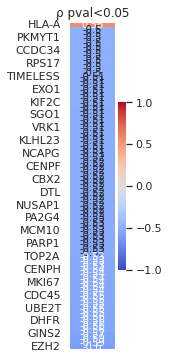

In [258]:
subset=pd.DataFrame(significant_somatome["spearman"])
plt.figure(figsize=(1,6))
ax=sns.heatmap(subset,cmap="coolwarm",cbar=True,annot=True,vmin=-1,vmax=1,xticklabels=False,annot_kws={"size": 10})
plt.title("\u03C1 pval<0.05",loc='center')
plt.savefig("../outputs/spearman_somatome_03.svg",bbox_inches='tight')

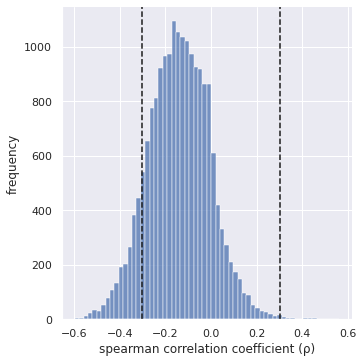

In [259]:
ax=sns.displot(corr_df_somatome.spearman,bins=60)
ax.set(xlabel='spearman correlation coefficient (\u03C1)',ylabel="frequency")
plt.axvline(0.3, color="k", linestyle="--")
plt.axvline(-0.3, color="k", linestyle="--")
plt.savefig("../outputs/spearman_dist_somatome.svg")

In [260]:
corr_results_somatome_pe=[]
for (index,row) in somatome.iterrows():
    cval=pearsonr((si.secreted.values+1),(row.values+1))
    corr_results_somatome_pe.append(cval)

/zhome/89/0/75762/manuel/DeepSecret/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [261]:
corr_df_somatome_pe=pd.DataFrame(corr_results_somatome_pe)
corr_df_somatome_pe.index=somatome.index.values
corr_df_somatome_pe.columns=["pearson","pval"]

In [262]:
corr_df_somatome_pe.sort_values(by="pearson",ascending=False).head(10)

pearson  pval
SSR4      0.576577   0.0
CPE       0.443632   0.0
CD99      0.441495   0.0
SCGN      0.429630   0.0
ELAPOR1   0.409966   0.0
CYSTM1    0.387648   0.0
PTPRN     0.386733   0.0
TM4SF4    0.380403   0.0
TMEM176B  0.371172   0.0
RNASEK    0.361311   0.0

In [263]:
corr_df_somatome_pe.sort_values(by="pearson",ascending=False).tail(10)

pearson  pval
RPL38   -0.275978   0.0
SAE1    -0.278203   0.0
PA2G4   -0.278453   0.0
NME1    -0.278505   0.0
RPSA    -0.281090   0.0
HNRNPA1 -0.284054   0.0
TUBB    -0.291587   0.0
LDHB    -0.292520   0.0
JPT1    -0.301174   0.0
MIR4485       NaN   NaN

In [264]:
corr_df_somatome_pe.sort_values(by="pearson",ascending=False).to_csv("../outputs/pearson_somatome.csv")

In [265]:
#subset only significantly correlated secretory pathway genes
significant_somatome_pe=corr_df_somatome_pe[(corr_df_somatome_pe["pearson"]<=-0.3)|(corr_df_somatome_pe["pearson"]>=0.3)].sort_values(by="pearson",ascending=False)

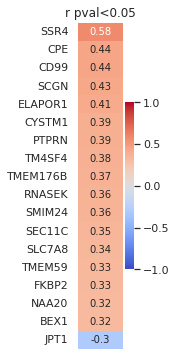

In [266]:
subset=pd.DataFrame(significant_somatome_pe["pearson"])
plt.figure(figsize=(1,6))
ax=sns.heatmap(subset,cmap="coolwarm",cbar=True,annot=True,vmin=-1,vmax=1,xticklabels=False,annot_kws={"size": 10})
plt.title("r pval<0.05",loc='center')
plt.savefig("../outputs/pearson_somatome_03.svg",bbox_inches='tight')

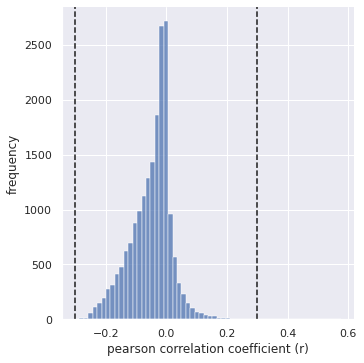

In [267]:
ax=sns.displot(corr_df_somatome_pe.pearson,bins=60)
ax.set(xlabel='pearson correlation coefficient (r)',ylabel="frequency")
plt.axvline(0.3, color="k", linestyle="--")
plt.axvline(-0.3, color="k", linestyle="--")
plt.savefig("../outputs/pearson_dist_somatome.svg")